In [ ]:
#pip install --upgrade scikit-learn

In [ ]:

import pandas as pd  #importing the necessary packages
import warnings
warnings.filterwarnings("ignore")
import shutil
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
#from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import f1_score, make_scorer
import itertools
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn import svm
from sklearn.decomposition import PCA
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.manifold import TSNE
from sklearn import preprocessing

#from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations
import random as r
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Loading the data into dataframes
df_train=pd.read_csv("KDDTrain+.txt")
df_test=pd.read_csv("KDDTest+.txt")

df_train.head() #checking the first 5 rows of the data


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
df_train.tail() #checking the last 5 rows of the data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [ ]:
 #checking the shape and the total number of attributes of the data
print("Number of data points in train data", df_train.shape)
print('-'*50)
print("The attributes of data :", df_train.columns.values)

Number of data points in train data (125972, 43)
--------------------------------------------------
The attributes of data : ['0' 'tcp' 'ftp_data' 'SF' '491' '0.1' '0.2' '0.3' '0.4' '0.5' '0.6' '0.7'
 '0.8' '0.9' '0.10' '0.11' '0.12' '0.13' '0.14' '0.15' '0.16' '0.18' '2'
 '2.1' '0.00' '0.00.1' '0.00.2' '0.00.3' '1.00' '0.00.4' '0.00.5' '150'
 '25' '0.17' '0.03' '0.17.1' '0.00.6' '0.00.7' '0.00.8' '0.05' '0.00.9'
 'normal' '20']


In [ ]:
print("Number of data points in test data", df_test.shape)
print(df_test.columns.values)
df_test.head(2)

Number of data points in test data (22543, 43)
['0' 'tcp' 'private' 'REJ' '0.1' '0.2' '0.3' '0.4' '0.5' '0.6' '0.7' '0.8'
 '0.9' '0.10' '0.11' '0.12' '0.13' '0.14' '0.15' '0.16' '0.17' '0.18'
 '229' '10' '0.00' '0.00.1' '1.00' '1.00.1' '0.04' '0.06' '0.00.2' '255'
 '10.1' '0.04.1' '0.06.1' '0.00.3' '0.00.4' '0.00.5' '0.00.6' '1.00.2'
 '1.00.3' 'neptune' '21']


,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21


In [ ]:
df_train.dtypes  #checking the datatypes of all the columns

0             int64
tcp          object
ftp_data     object
SF           object
491           int64
0.1           int64
0.2           int64
0.3           int64
0.4           int64
0.5           int64
0.6           int64
0.7           int64
0.8           int64
0.9           int64
0.10          int64
0.11          int64
0.12          int64
0.13          int64
0.14          int64
0.15          int64
0.16          int64
0.18          int64
2             int64
2.1           int64
0.00        float64
0.00.1      float64
0.00.2      float64
0.00.3      float64
1.00        float64
0.00.4      float64
0.00.5      float64
150           int64
25            int64
0.17        float64
0.03        float64
0.17.1      float64
0.00.6      float64
0.00.7      float64
0.00.8      float64
0.05        float64
0.00.9      float64
normal       object
20            int64
dtype: object

In [ ]:
#renaming the columns
df_train = df_train.rename(columns={"0":"Duration","tcp":"protocol_type","ftp_data":"service","SF":"flag","491":"src_bytes",
                                    "0.1":"dest_bytes","0.2":"Land","0.3":"wrong_fragment","0.4":"Urgent packets","0.5":"hot",
                                    "0.6":"num_failed_logins","0.7":"logged_in","0.8":"num_compromised","0.9":"root_shell",
                                    "0.10":"su_attempted","0.11":"num_root","0.12":"num_file_creations","0.13":"num_shells",
                                    "0.14":"num_access_files","0.15":"num_outbound_cmds","0.16":"is_host_login","0.17":"is_guest_login",
                                    "2":"count","2.1":"srv_count","0.00":"serror_rate","0.00.1":"srv_serror_rate","0.00.2":"rerror_rate",
                                    "0.00.3":"srv_rerror_rate","1.00":"same_srv_rate","0.00.4":"diff_srv_rate","0.00.5":"srv_diff_host_rate",
                                    "150":"dst_host_count","25":"dst_host_srv_count","0.17.1":"dst_host_same_srv_rate",
                                    "0.03":"dst_host_diff_srv_rate","0.17.2":"dst_host_same_src_port_rate",
                                    "0.00.6":"dst_host_srv_diff_host_rate","0.00.7":"dst_host_serror_rate",
                                    "0.00.8":"dst_host_srv_serror_rate","0.05":"dst_host_rerror_rate","0.00.9":"dst_host_srv_rerror_rate",
                                    "normal":"attack_type","20":"Score"})


# In[ ]:
print(df_train['protocol_type'].value_counts())
print(df_train['flag'].value_counts())

df_train.head()  #checking the dataframe after renaming

tcp     102688
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64


,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,...,is_guest_login,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
#renaming the columns of test data

df_test = df_test.rename(columns={"0":"Duration","tcp":"protocol_type","private":"service","REJ":"flag","0.1":"src_bytes",
                                    "0.2":"dest_bytes","0.3":"Land","0.4":"wrong_fragment","0.5":"Urgent packets","0.6":"hot",
                                    "0.7":"num_failed_logins","0.8":"logged_in","0.9":"num_compromised","0.10":"root_shell",
                                    "0.11":"su_attempted","0.12":"num_root","0.13":"num_file_creations","0.14":"num_shells",
                                    "0.15":"num_access_files","0.16":"num_outbound_cmds","0.17":"is_host_login","0.18":"is_guest_login",
                                    "229":"count","10":"srv_count","0.00":"serror_rate","0.00.1":"srv_serror_rate","1.00":"rerror_rate",
                                    "1.00.1":"srv_rerror_rate","0.04":"same_srv_rate","0.06":"diff_srv_rate","0.00.2":"srv_diff_host_rate",
                                    "255":"dst_host_count","10.1":"dst_host_srv_count","0.04.1":"dst_host_same_srv_rate",
                                    "0.06.1":"dst_host_diff_srv_rate","0.00.3":"dst_host_same_src_port_rate",
                                    "0.00.4":"dst_host_srv_diff_host_rate","0.00.5":"dst_host_serror_rate",
                                    "0.00.6":"dst_host_srv_serror_rate","1.00.2":"dst_host_rerror_rate","1.00.3":"dst_host_srv_rerror_rate",
                                    "neptune":"attack_type","21":"Score"})


# In[ ]:


df_test.head()


,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
# Rows containing duplicate data
duplicate_rows_df = df_train[df_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 43)


In [ ]:
# Finding the null values.
print(df_train.isnull().sum())

Duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dest_bytes                     0
Land                           0
wrong_fragment                 0
Urgent packets                 0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
0.18                           0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:

label_encoder1 = preprocessing.LabelEncoder()
df_train['protocol_type']= label_encoder1.fit_transform(df_train['protocol_type'])
a=label_encoder1.classes_


In [ ]:
int_features=['tcp','private','REJ']
int_features

['tcp', 'private', 'REJ']

In [ ]:

for i in range(len(a)):
        if a[i]==int_features[0]:
            int_features[0]=i

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
from sklearn.preprocessing import StandardScaler
import pandas as pd

app = Flask(__name__)



In [ ]:
@app.route('/')
def home():
    if request.method == "POST":

        return render_template("index.html")

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [x for x in request.form.values()]


<Axes: >

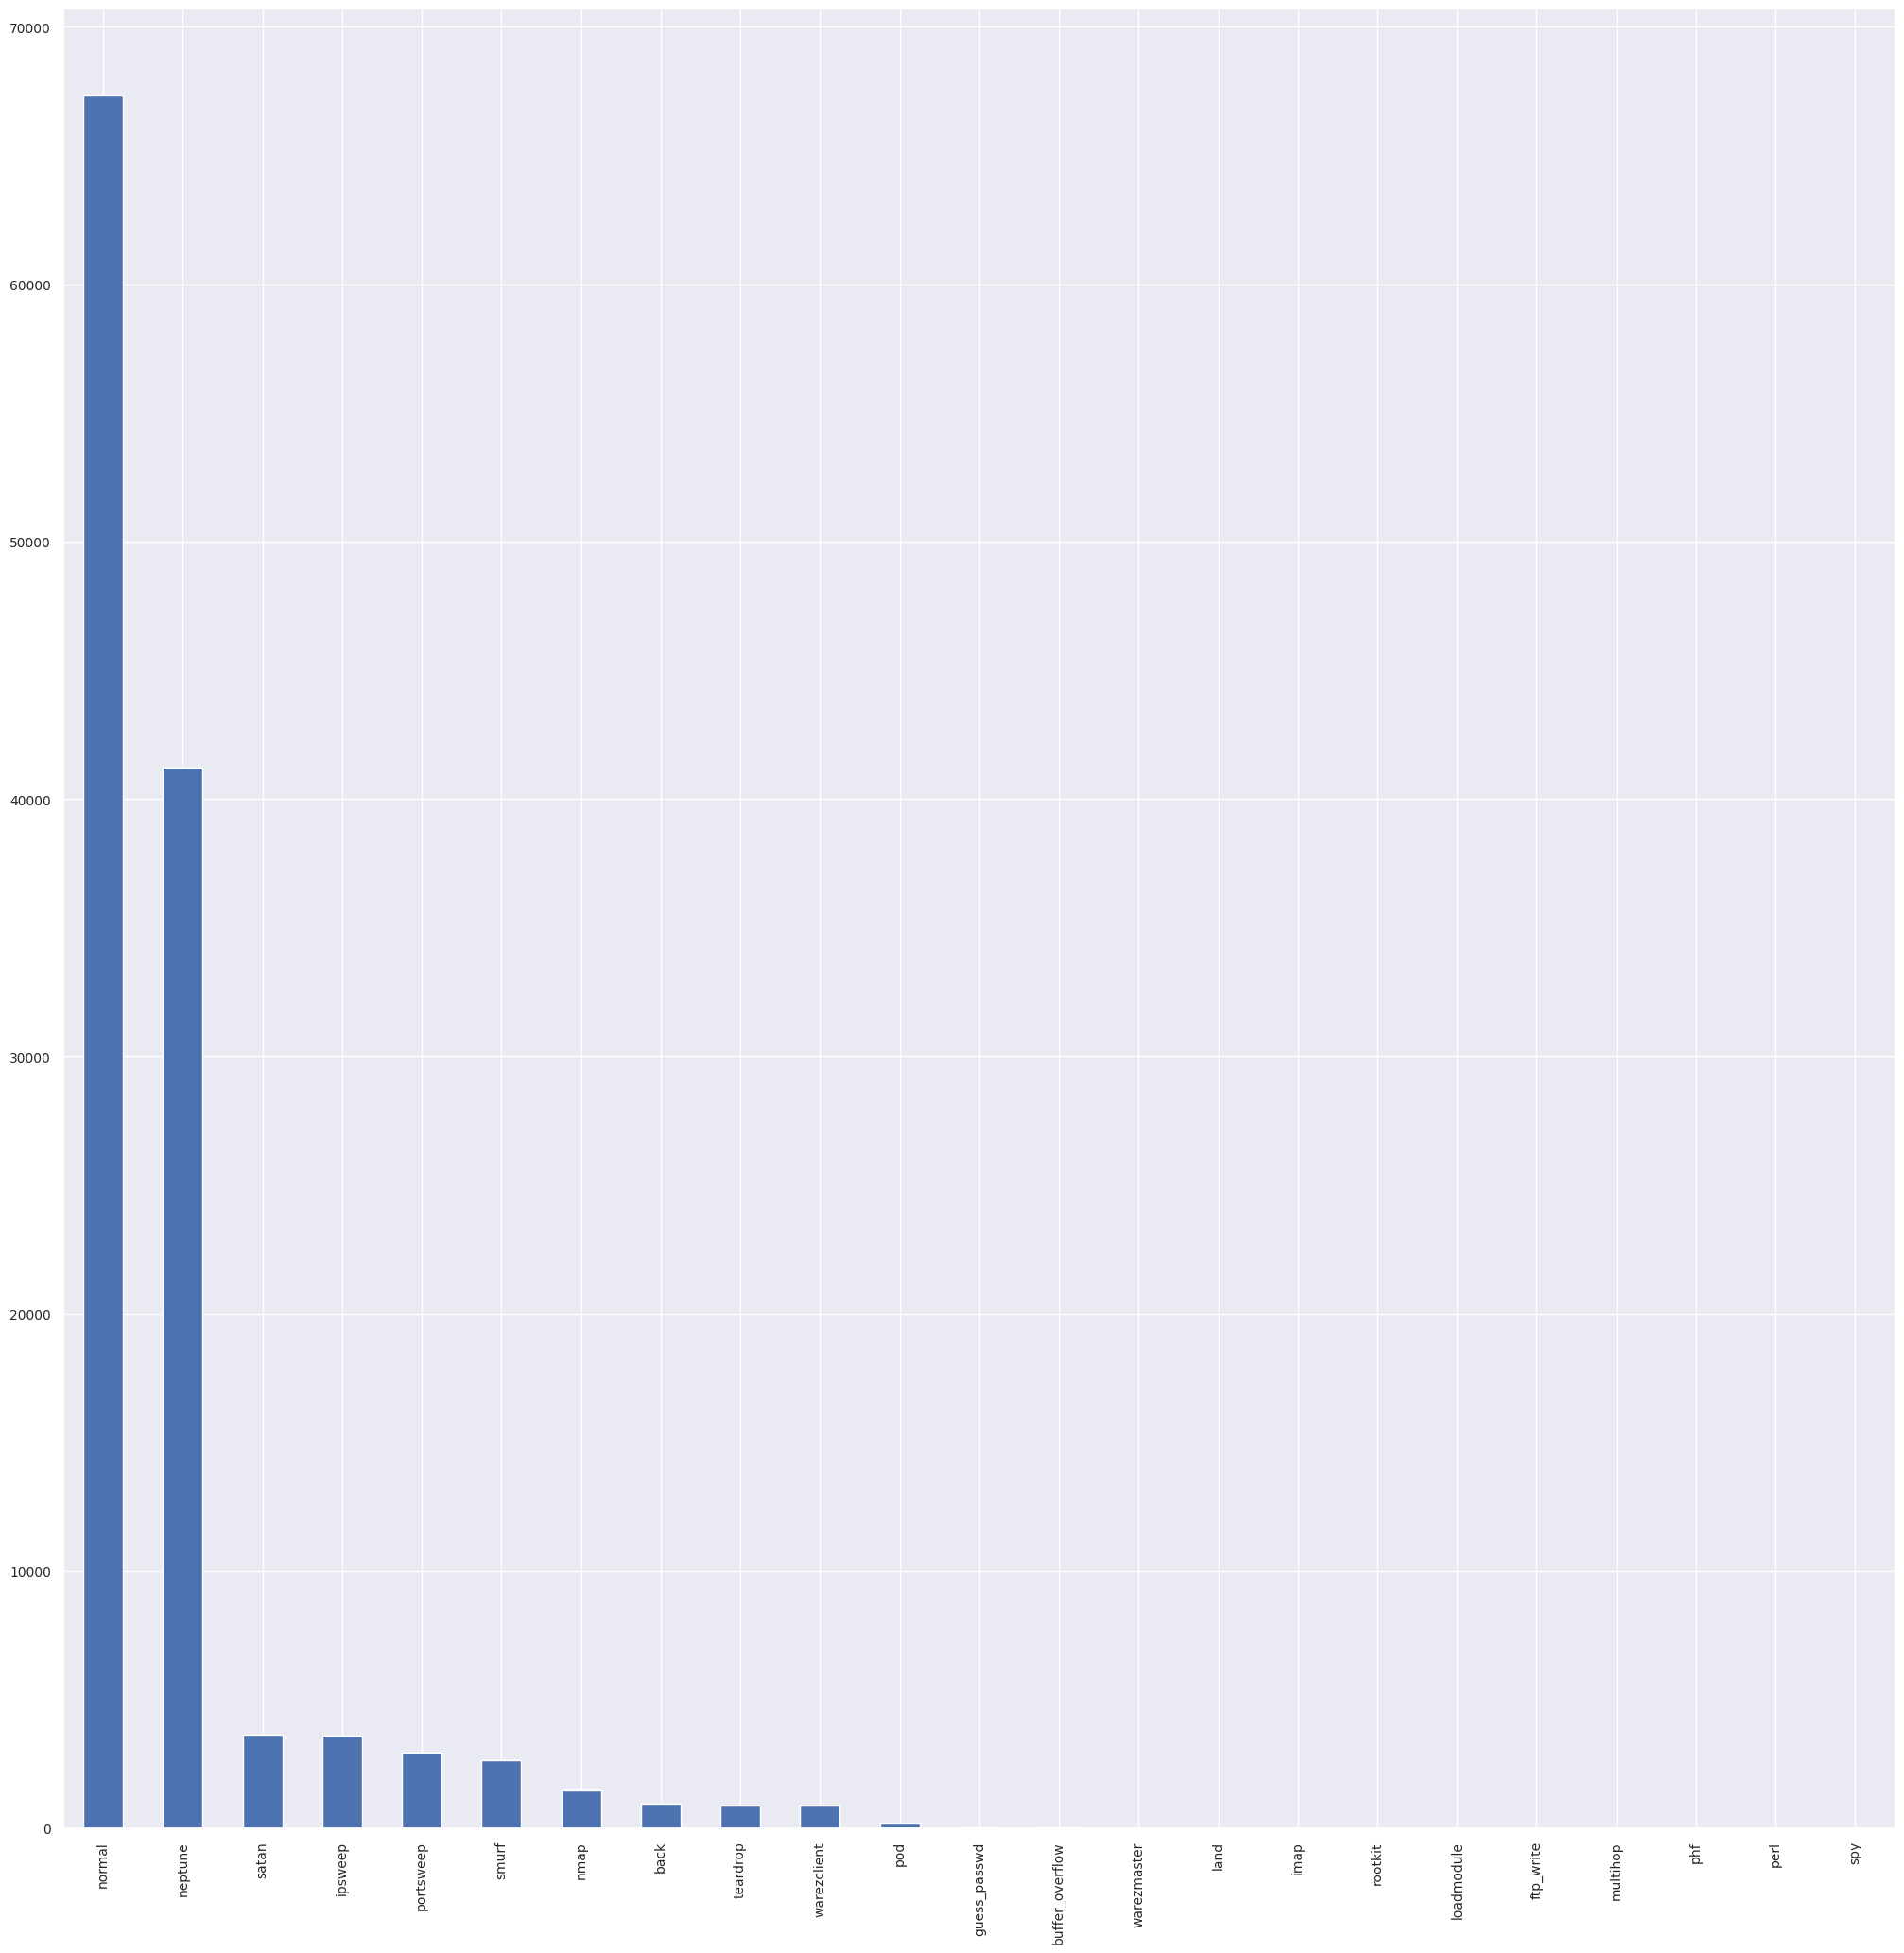

In [ ]:
# # Exploratory Data Analysis

y_value_counts = df_train['attack_type'].value_counts()  #checking the distribution of different class of the class label


# Ploting the bar plot of attack type variable to check the distribution of different class in the dataset-Train

get_ipython().run_line_magic('matplotlib', 'inline')
y_value_counts.plot(kind="bar", fontsize=10)


<Axes: >

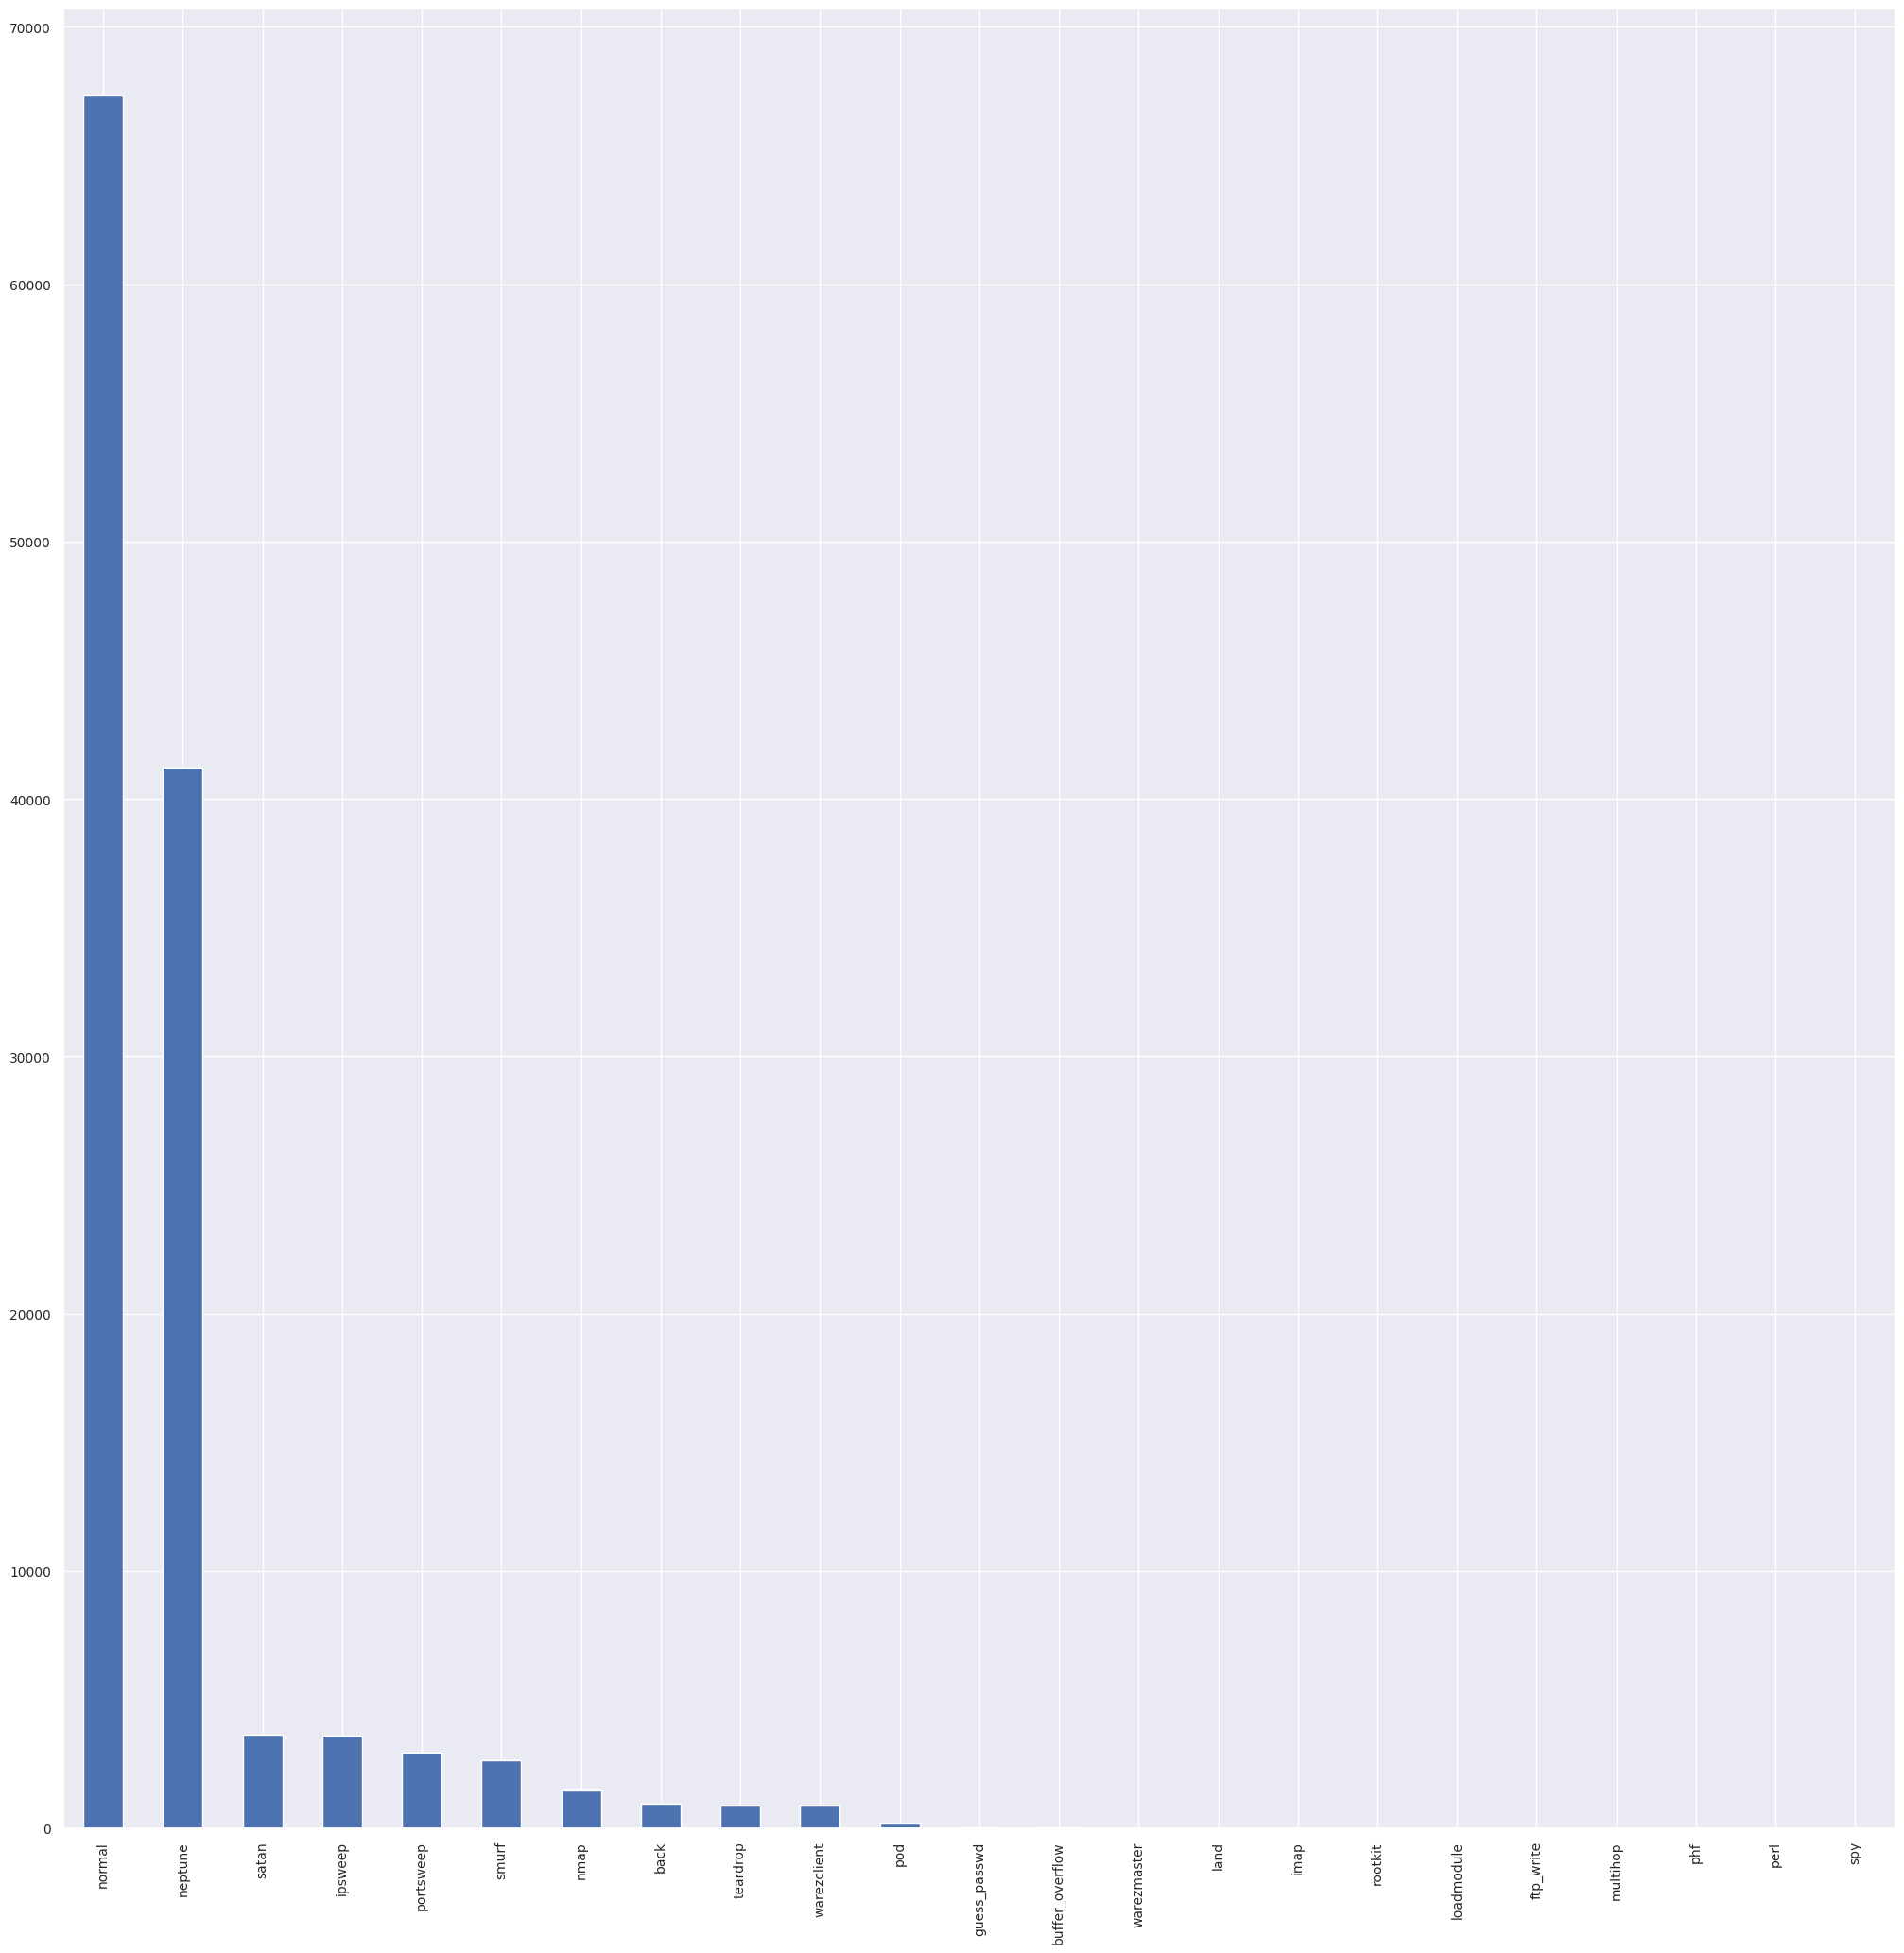

In [ ]:
# Ploting the bar plot of attack type variable to check the distribution of different class in the dataset-Test

y_test_value_counts = df_train['attack_type'].value_counts()
get_ipython().run_line_magic('matplotlib', 'inline')
y_test_value_counts.plot(kind="bar", fontsize=10)


# Observation: The above plot clearly shows that the attack type "normal" has the highest distribution
# in the data followed by "neptune" and then the other classes whose value count is very less compared
#to these two classes. The distribution is almost same for both test dataset and train dataset.


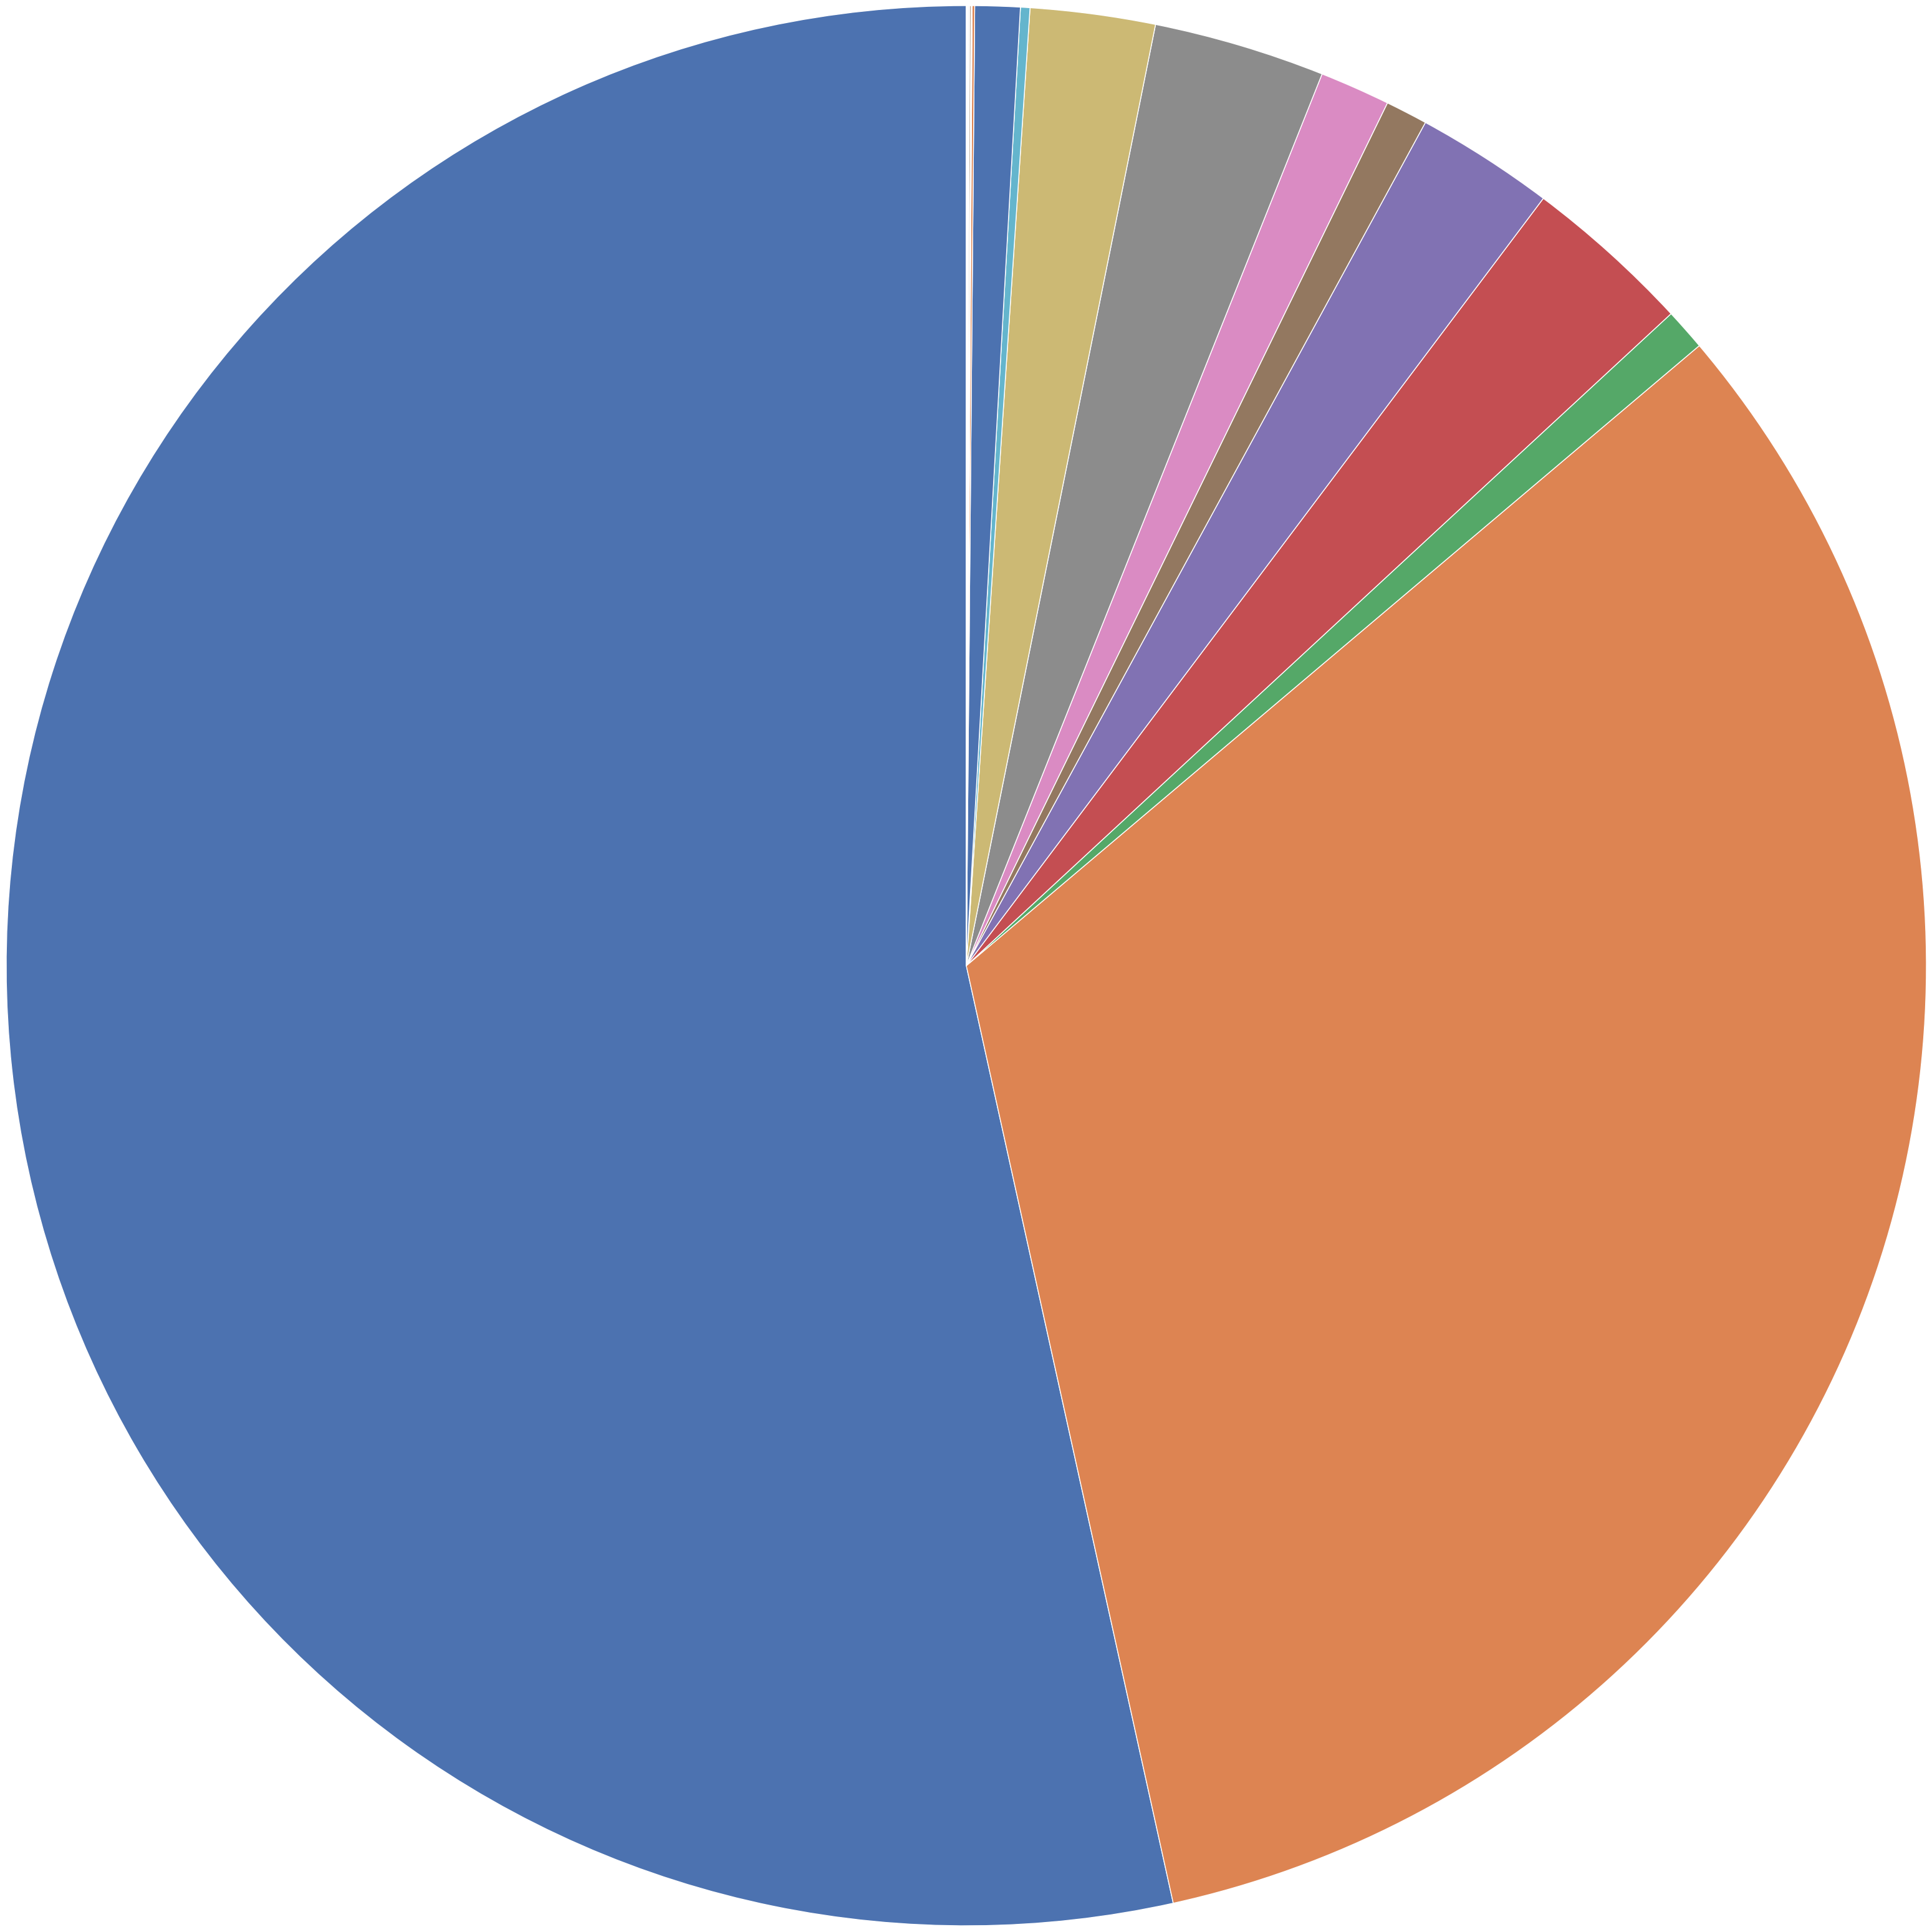

In [ ]:
# counter = Counter(df_train['attack_type'])
# a=dict(counter)
# per=[]
# for k,v in counter.items():
# 	per.append(v / len(df_train['attack_type']) * 100) #calculating the percentage distribution of my class label


# # ## Plotting the pie chart of attack type with the percentage distribution of each attack type
# patches, texts = plt.pie(per, startangle=90, radius=2)  #https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart
# labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(a.keys(), per)]
# patches, labels, dummy =  zip(*sorted(zip(patches, labels, per),
#                                           key=lambda x: x[2],
#                                           reverse=True))

# plt.legend(patches,labels , loc='left center', bbox_to_anchor=(-0.1, 1.), fontsize=8)

# plt.savefig('piechart.png', bbox_inches='tight')


# The above plot gives an idea of the percentage value of each class. The normal class covers almost 53%
#of the data followed by neptune class which covers 32% and then the rest of the classes each covering
#less than 3% of the entire dataset. From the above plot we can conclude that our dataset is an imbalanced
# dataset with huge  difference in the distribution of different class labels

# patches,texts = plt.pie(per, startangle=90, radius=2)  #https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart
# labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(a.keys(), per)]
# patches, labels, dummy =  zip(*sorted(zip(patches, labels, per),
#                                           key=lambda x: x[2],
#                                           reverse=True))




# Lets have a look at the distribution of each feature of the dataframe.dataset with huge
# difference in the distribution of different class labels



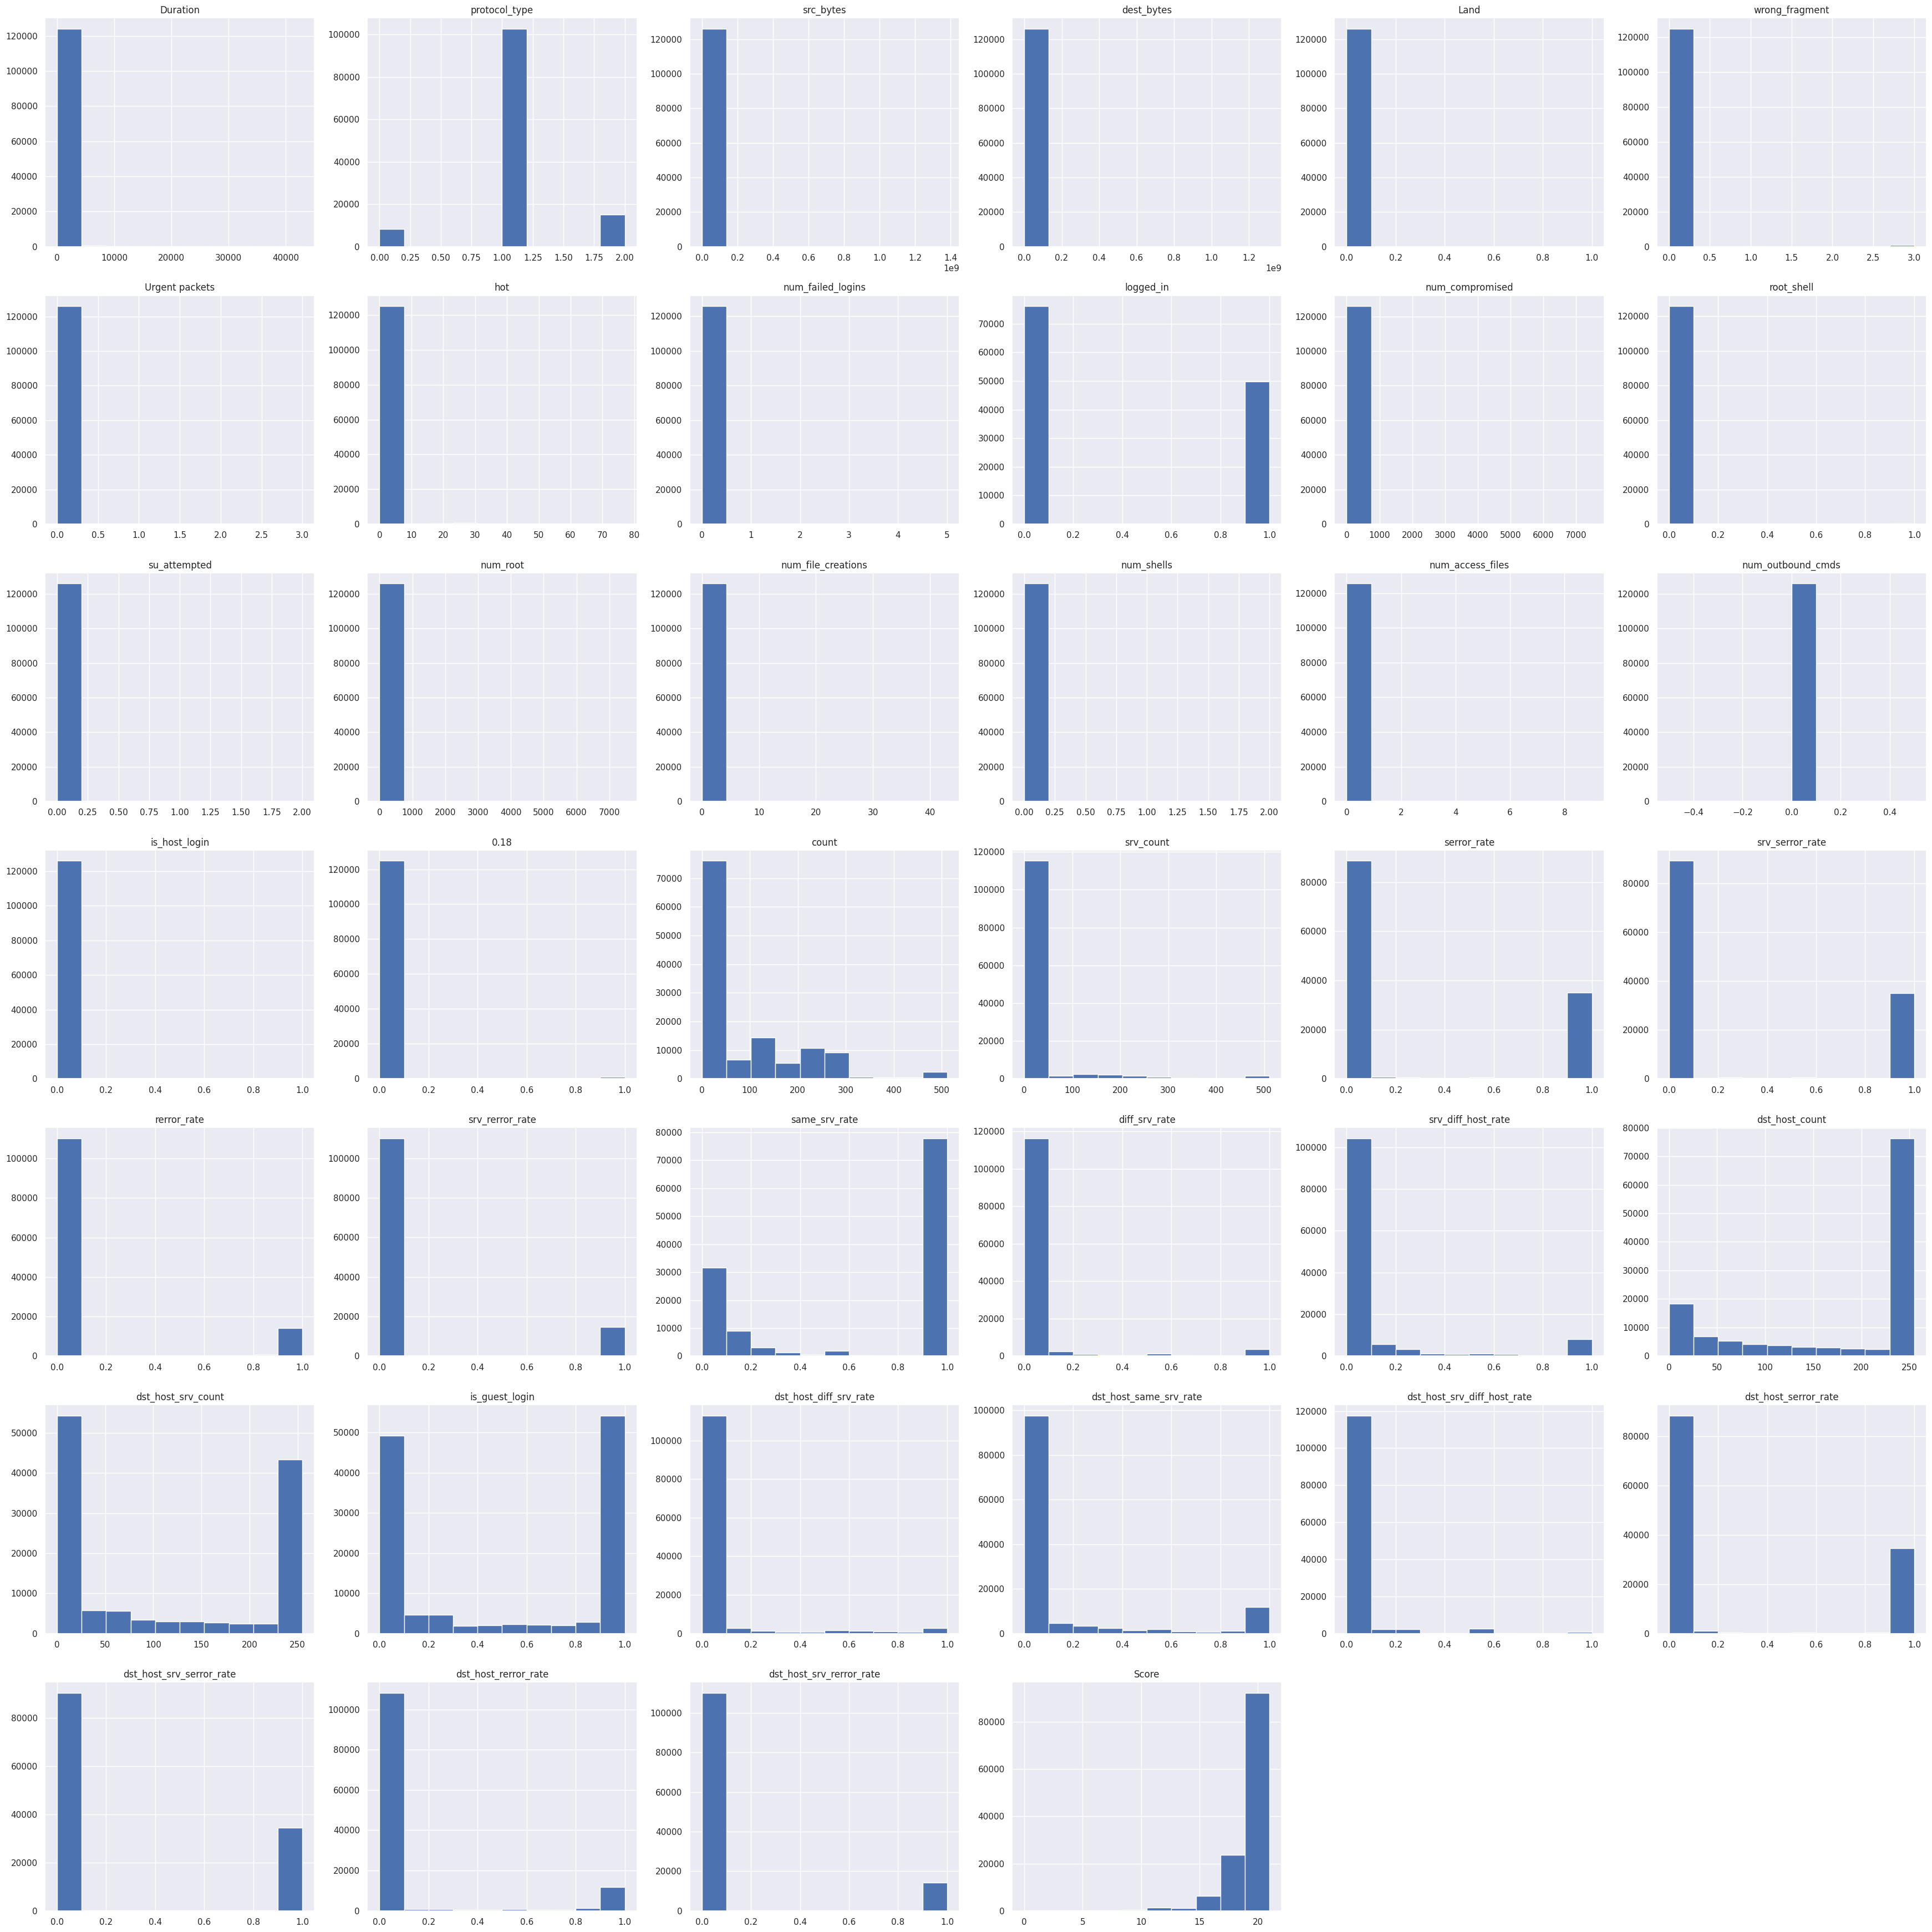

In [ ]:
# Lets have a look at the distribution of each feature of the dataframe.dataset with huge
# difference in the distribution of different class labels
df_train.hist(figsize=(35,35))
plt.tight_layout()
plt.show()


In [ ]:
#  Now lets view the correlation between features and target variable.
!pip install phik
import phik
from phik import resources, report
corr_matrix=df_train.phik_matrix()
corr_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 17.1 MB/s eta 0:00:00
interval columns not set, guessing: ['Duration', 'protocol_type', 'src_bytes', 'dest_bytes', 'Land', 'wrong_fragment', 'Urgent packets', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', '0.18', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'is_guest_login', 'dst_host_diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Score']


,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,...,is_guest_login,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
Duration,1.000000,0.137743,0.450609,0.405342,0.164407,0.135033,0.000000,0.000000,0.015780,0.104382,...,0.137206,0.592465,0.298200,0.033399,0.110079,0.140700,0.233072,0.240959,0.410612,0.328373
protocol_type,0.137743,1.000000,0.986618,0.427788,0.000000,0.000000,0.003250,0.481678,0.000000,0.039577,...,0.333489,0.276879,0.589328,0.590744,0.334486,0.332243,0.203144,0.210402,0.839022,0.493724
service,0.450609,0.986618,1.000000,0.692821,0.017733,0.000000,0.139223,0.406253,0.050499,0.603425,...,0.815051,0.560429,0.682359,0.687488,0.626868,0.633223,0.415572,0.428705,0.857744,0.610648
flag,0.405342,0.427788,0.692821,1.000000,0.181184,0.040010,0.021895,0.093140,0.000000,0.053099,...,0.542758,0.466461,0.339359,0.208443,0.648644,0.682778,0.627790,0.654591,0.802958,0.337941
src_bytes,0.164407,0.000000,0.017733,0.181184,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007222,0.024774,0.008196,0.000000,0.018050,0.068280,0.022896,0.072944,0.029345,0.084673
dest_bytes,0.135033,0.000000,0.000000,0.040010,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.053766,0.011117,0.000000,0.000000,0.000000,0.011239,0.008128,0.035515,0.096407
Land,0.000000,0.003250,0.139223,0.021895,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.013003,0.000000,0.048302,0.135280,0.028235,0.129478,0.000000,0.000000,0.904487,0.101963
wrong_fragment,0.000000,0.481678,0.406253,0.093140,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.223740,0.123192,0.236966,0.093763,0.130825,0.068645,0.240024,0.040146,0.991632,0.310151
Urgent packets,0.015780,0.000000,0.050499,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.006526,0.016682,0.009224,0.182103,0.000000,0.000000,0.000000,0.000000,0.309222,0.065128
hot,0.104382,0.039577,0.603425,0.053099,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.165062,0.022226,0.023740,0.000000,0.081732,0.104588,0.020160,0.066959,0.340919,0.188387


In [ ]:

print(corr_matrix["attack_type"].sort_values(ascending=False)[1:])

corr = corr_matrix["attack_type"].sort_values(ascending=False)
# Hence we can conclude that the features which has strong correlation with the target variables are in below
#The above figure covers the rest all continous variables of our dataset and their individual distribution.
# The histograms shows for most of the features the data is unevenly distributed and one value dominates in
# all of them. Also we donot see any concrete observation from the distributions like whether the features are
# gaussian distributed or not. Hence no effective analysis can be made from the univariate analysis except the
# fact that the data's are unevenly distributed. Lets move to the Bivariate analysis and check relationship between
# features

wrong_fragment                 0.991632
Land                           0.904487
service                        0.857744
protocol_type                  0.839022
logged_in                      0.808240
flag                           0.802958
Score                          0.734857
count                          0.716956
dst_host_srv_diff_host_rate    0.711383
same_srv_rate                  0.672181
dst_host_serror_rate           0.670254
serror_rate                    0.659562
srv_count                      0.645647
srv_serror_rate                0.644567
dst_host_srv_serror_rate       0.643025
is_guest_login                 0.641616
dst_host_srv_count             0.638541
dst_host_diff_srv_rate         0.612409
dst_host_same_srv_rate         0.600643
num_failed_logins              0.588751
rerror_rate                    0.546387
dst_host_rerror_rate           0.543289
dst_host_count                 0.540562
diff_srv_rate                  0.527185
num_shells                     0.522351


0    124882
3       884
1       206
Name: wrong_fragment, dtype: int64

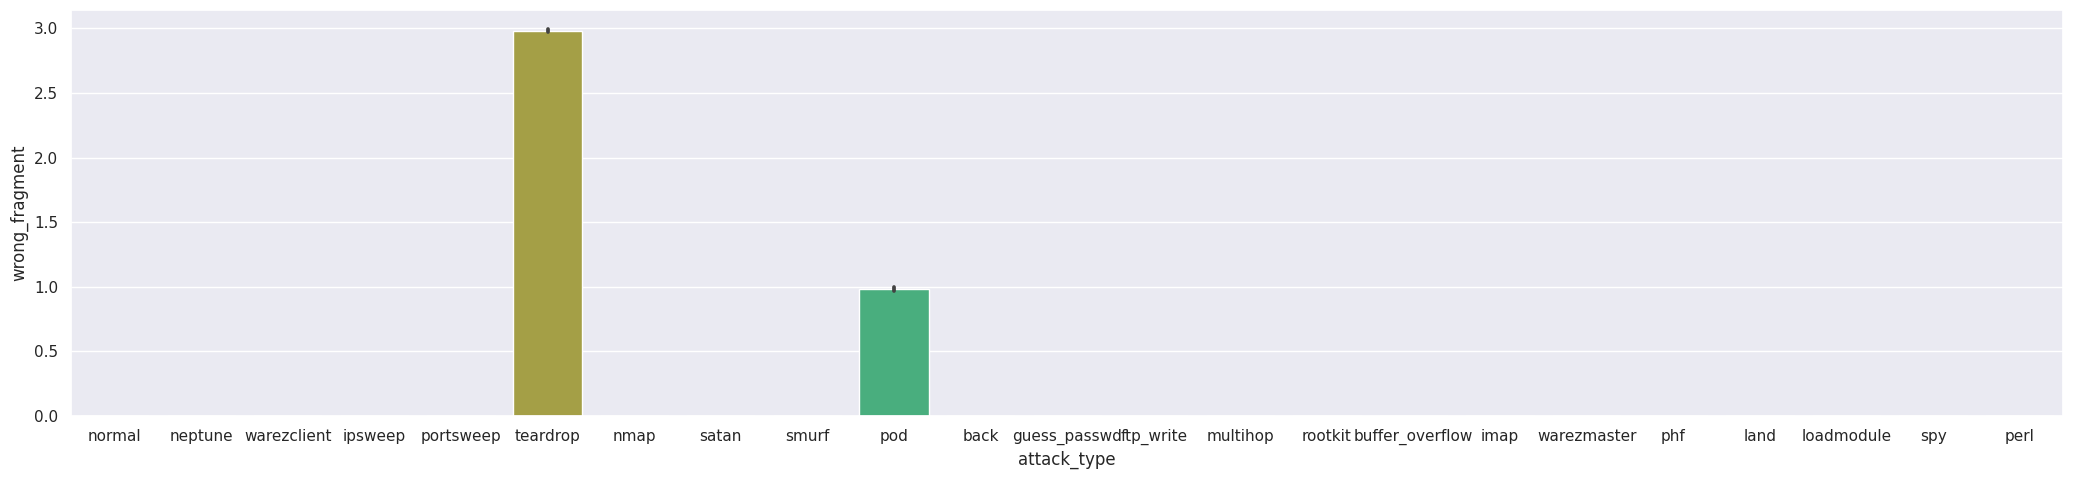

In [ ]:
# # **Univariate analysis**

# Here we will check the distribution of features which has strong correlation with target variable along with
# the class label.

# ## 1.Plot between wrong fragment and attack types

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,5.27)})
sns.barplot(x='attack_type',y='wrong_fragment',data=df_train)

df_train['wrong_fragment'].value_counts()
# Observation: Most of the records with wrong_fragment value "3" and "1" belongs to attack type "teardrop" and "pod".
#Now lets remove these types from the target class and visualize the distribution again




In [ ]:
df_dash= df_train[(df_train['attack_type'] != 'teardrop') & (df_train['attack_type'] != 'pod')]

<Axes: xlabel='attack_type', ylabel='wrong_fragment'>

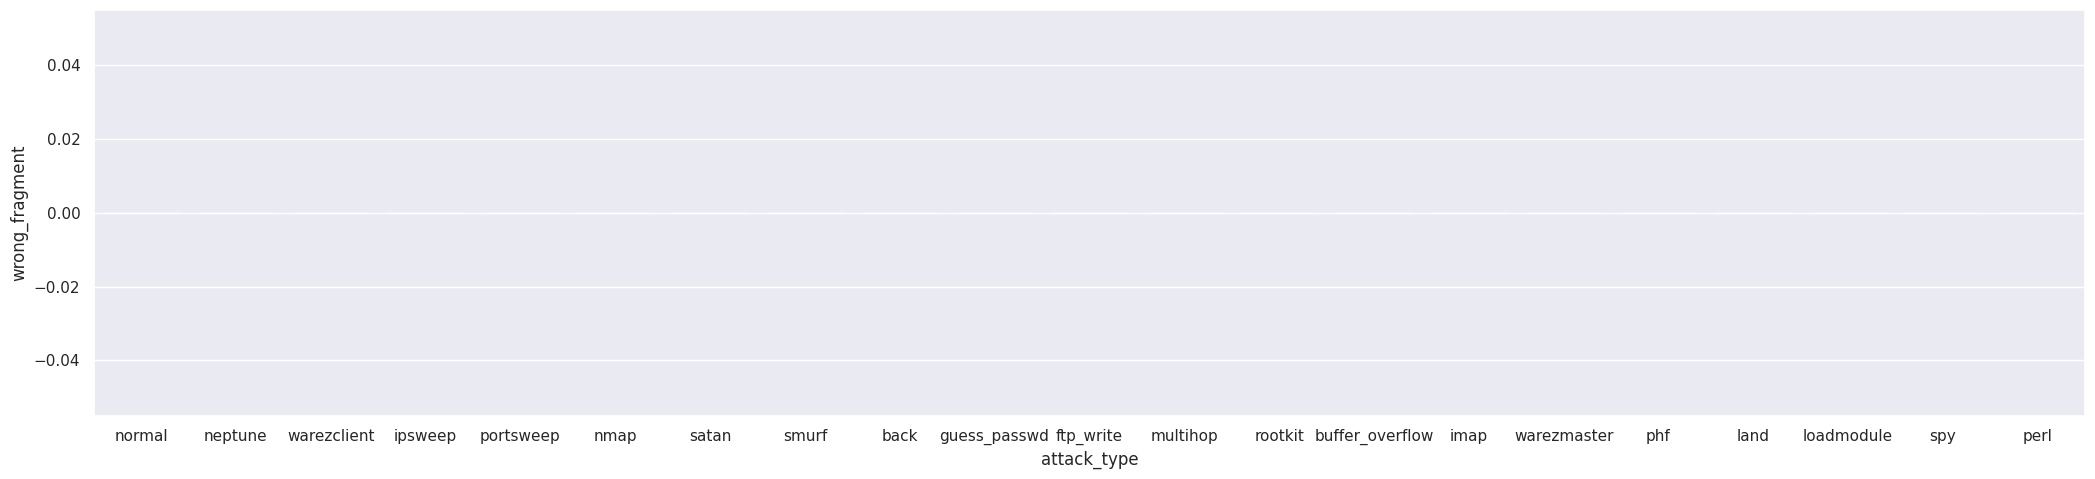

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,5.27)})
sns.barplot(x='attack_type',y='wrong_fragment',data=df_dash)


# Observation: We can say that rest all the datapoints belongs to wrong_fragment "0" and belongs to rest of the attack types.



<Axes: xlabel='attack_type', ylabel='wrong_fragment'>

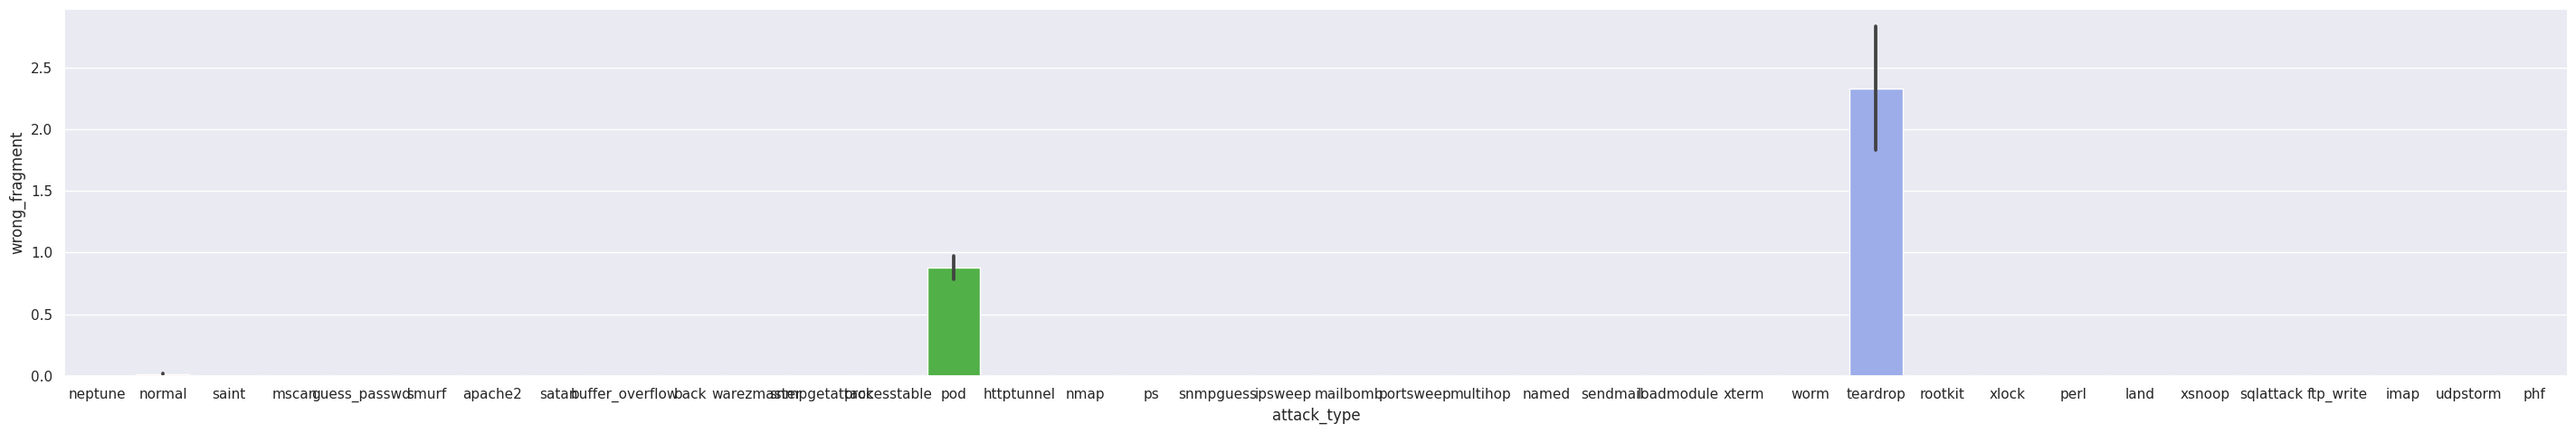

In [ ]:
# Now lets visualize the same for test dataset.
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(35.7,5.27)})
sns.barplot(x='attack_type',y='wrong_fragment',data=df_test)


# Here also we can observe the same distribution. Most datapoints with wrong fragment not equal to 0 belongs
# to attack type "teardrop" and "pod".


0    125947
1        25
Name: Land, dtype: int64

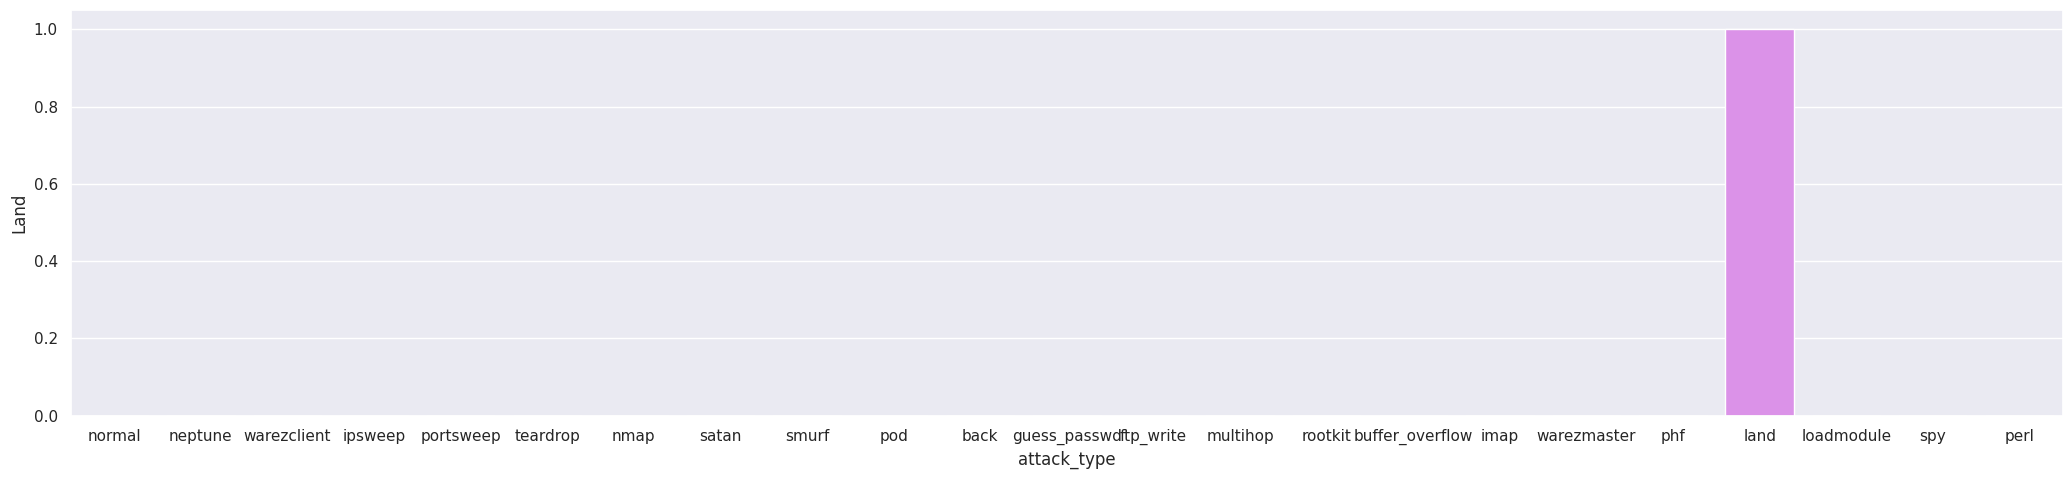

In [ ]:
# ## 2. Plot between land and attack type

get_ipython().run_line_magic('matplotlib', 'inline')
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,5.27)})
sns.barplot(x='attack_type',y='Land',data=df_train)
df_train['Land'].value_counts()


# Observation: As our feature is binary we can say that the datapoints with Land value 1 belongs to only attack type "land". We will visualize the distribution again after removing the "land" type from class label.






In [ ]:
df_dash= df_train[df_train['attack_type'] != 'land']

<Axes: xlabel='attack_type', ylabel='Land'>

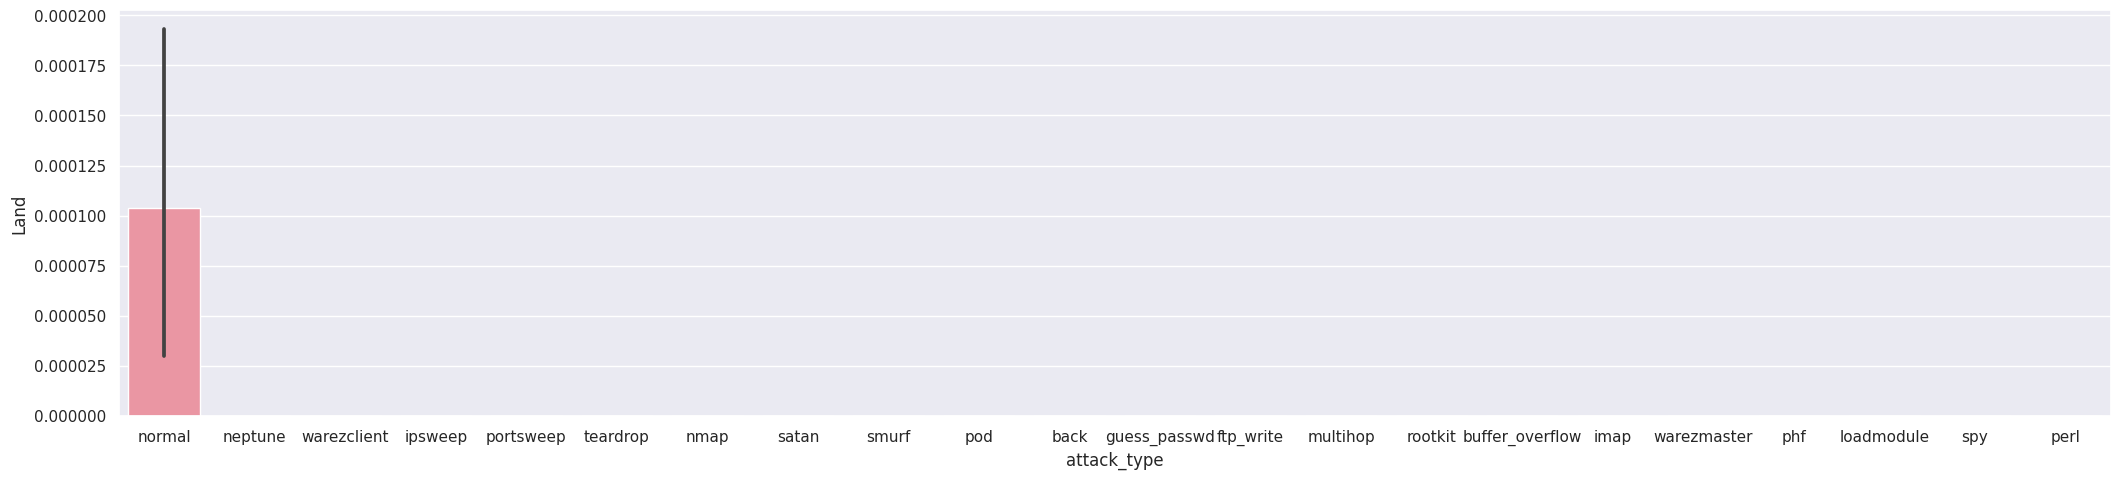

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,5.27)})
sns.barplot(x='attack_type',y='Land',data=df_dash)


# Observation: Attack type "normal" covers majority of the datapoints with Land value "0".



<Axes: xlabel='attack_type', ylabel='Land'>

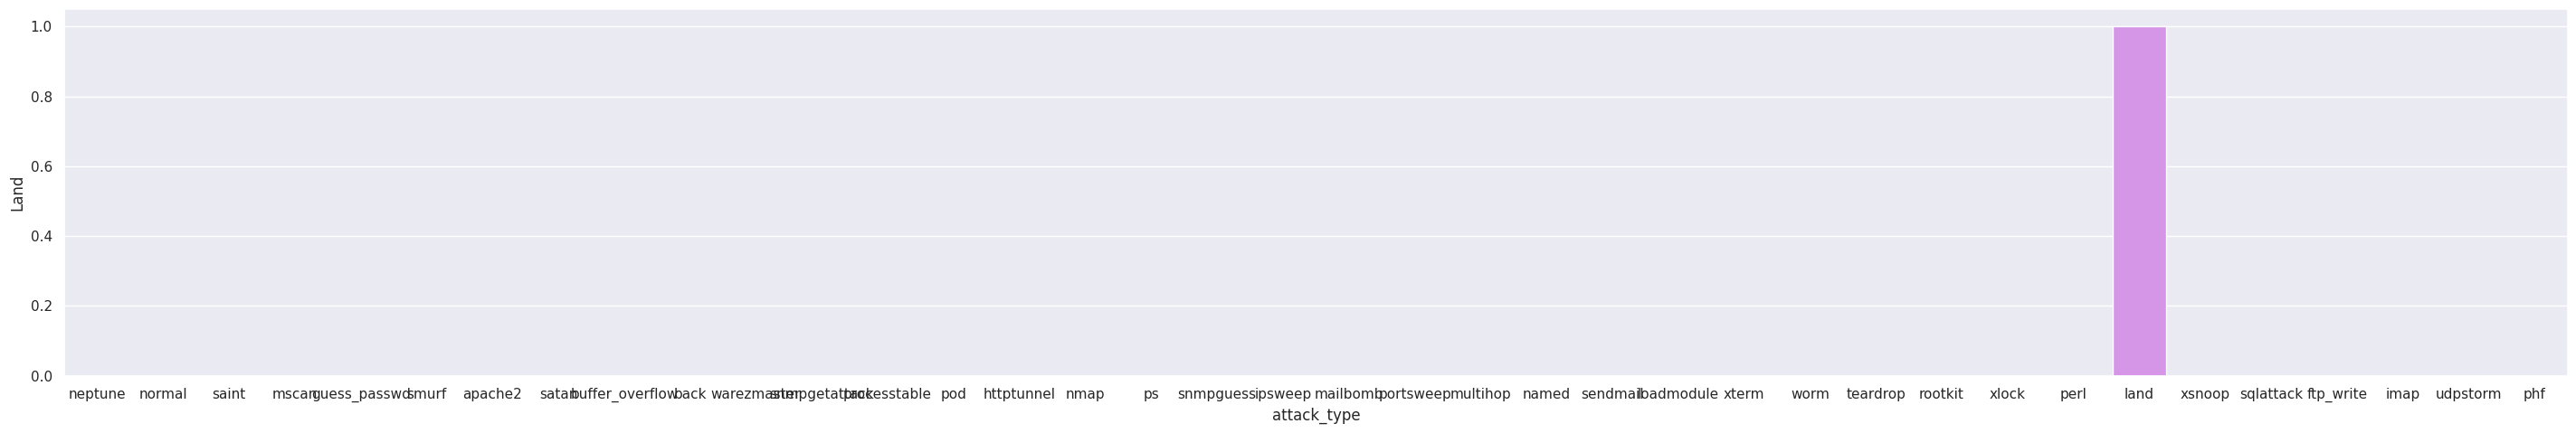

In [ ]:
# Lets check the same for test dataset.
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(35.7,5.27)})
sns.barplot(x='attack_type',y='Land',data=df_test)


# Observation: We can witness the same distribution of Land feature with attack type "land" in the test dataset as well.


<Axes: xlabel='attack_type', ylabel='service'>

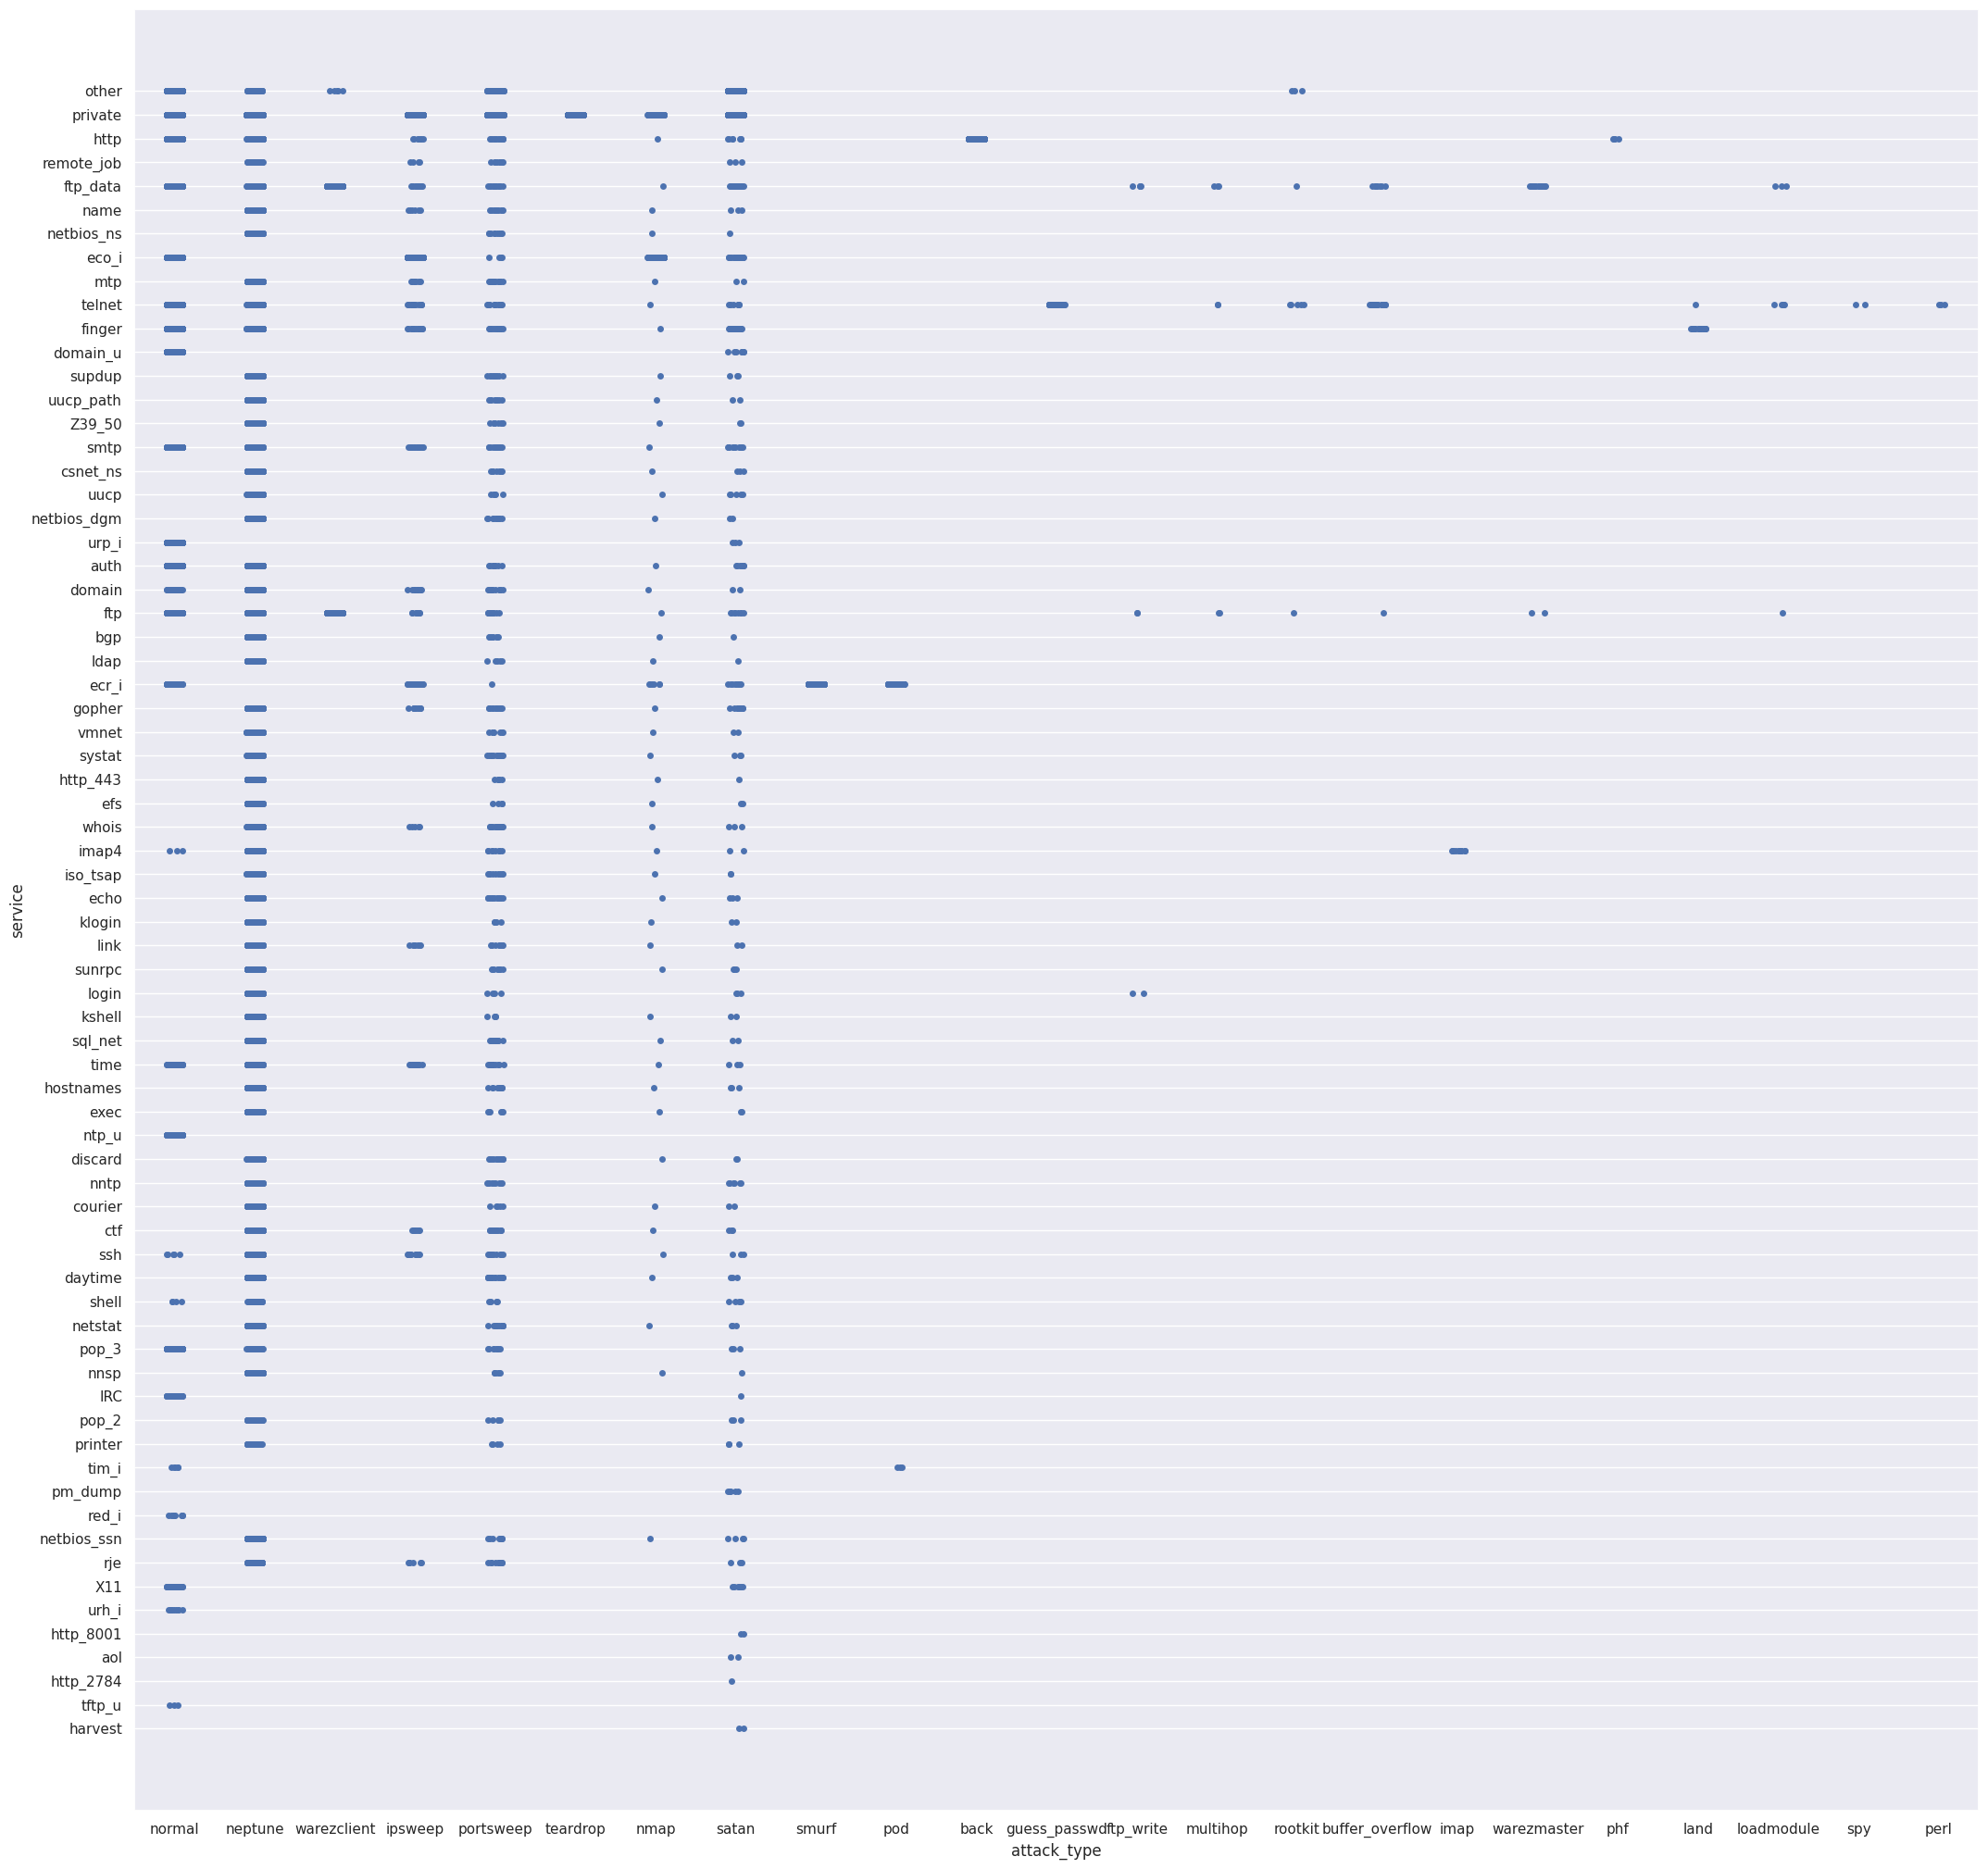

In [ ]:
# ## 3. Plot between Service and attack type

# In[ ]:


sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,25.27)})
sns.stripplot(x=df_train['attack_type'],y=df_train['service'])


# Observation : From the above plot we can say the different service types are distributed among all the attack types where "normal","neptune" and "portsweep" covers majority of the service types.

# In[ ]:




<Axes: xlabel='attack_type', ylabel='service'>

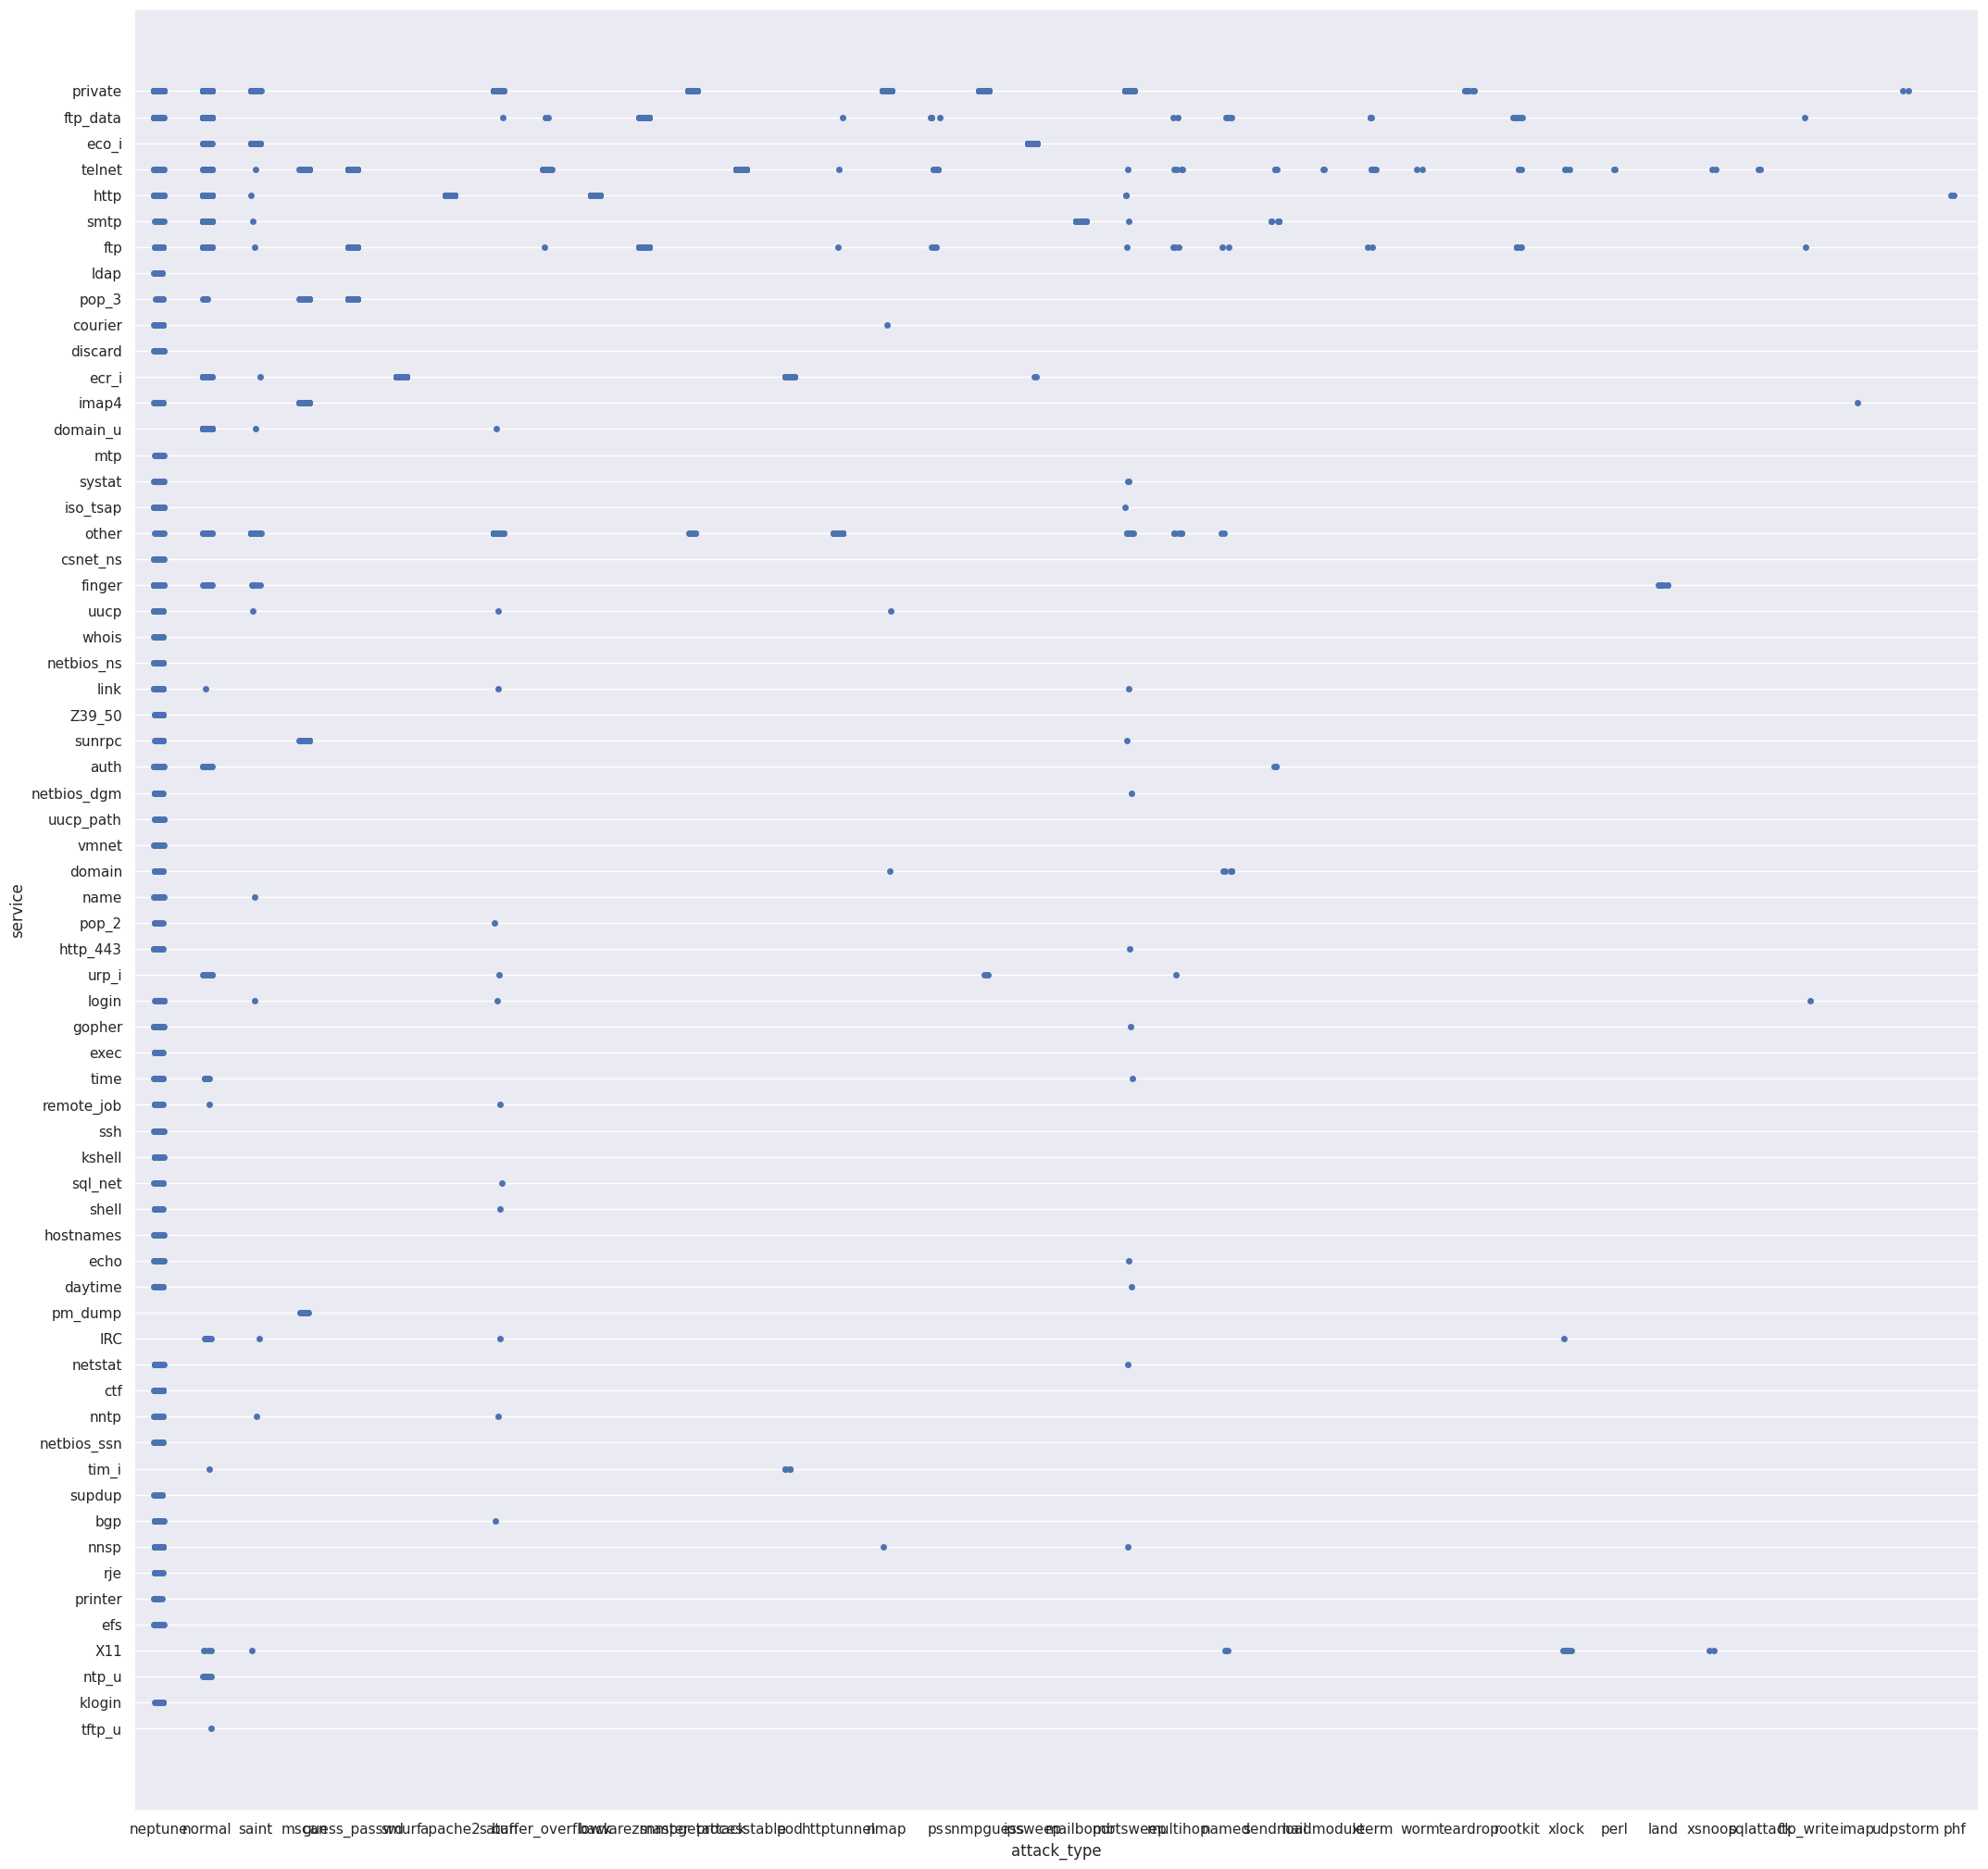

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,25.27)})
sns.stripplot(x=df_test['attack_type'],y=df_test['service'])


# Observation: The same can be seen for test dataset as well however we can conclude that attack type "normal" covers all the service types.


<Axes: xlabel='protocol_type', ylabel='count'>

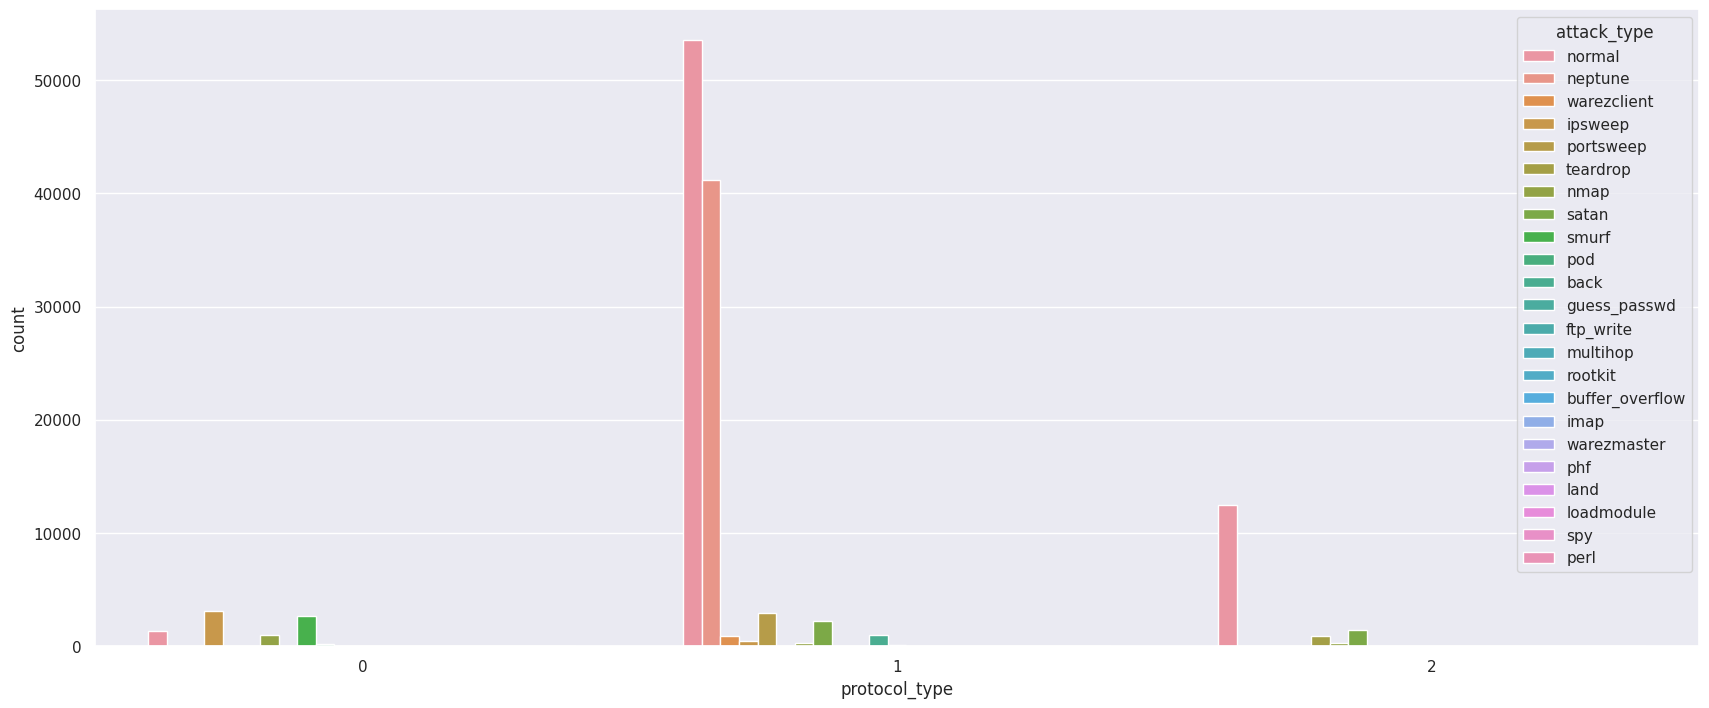

In [ ]:
## 4. Plot between protocol_type and attack type

# In[ ]:


get_ipython().run_line_magic('matplotlib', 'inline')
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.countplot(x='protocol_type',hue="attack_type",data=df_train)


# Observation: From the above plot we can observe that the protocol type "tcp" covers majority of the datapoints and is distributed between attack type "normal" and "neptune". We will visualize the same for test dataset.

# In[ untplot(x='protocol_type',hue="attack_type",data=df_test,palette = "Set2")




<Axes: xlabel='protocol_type', ylabel='count'>

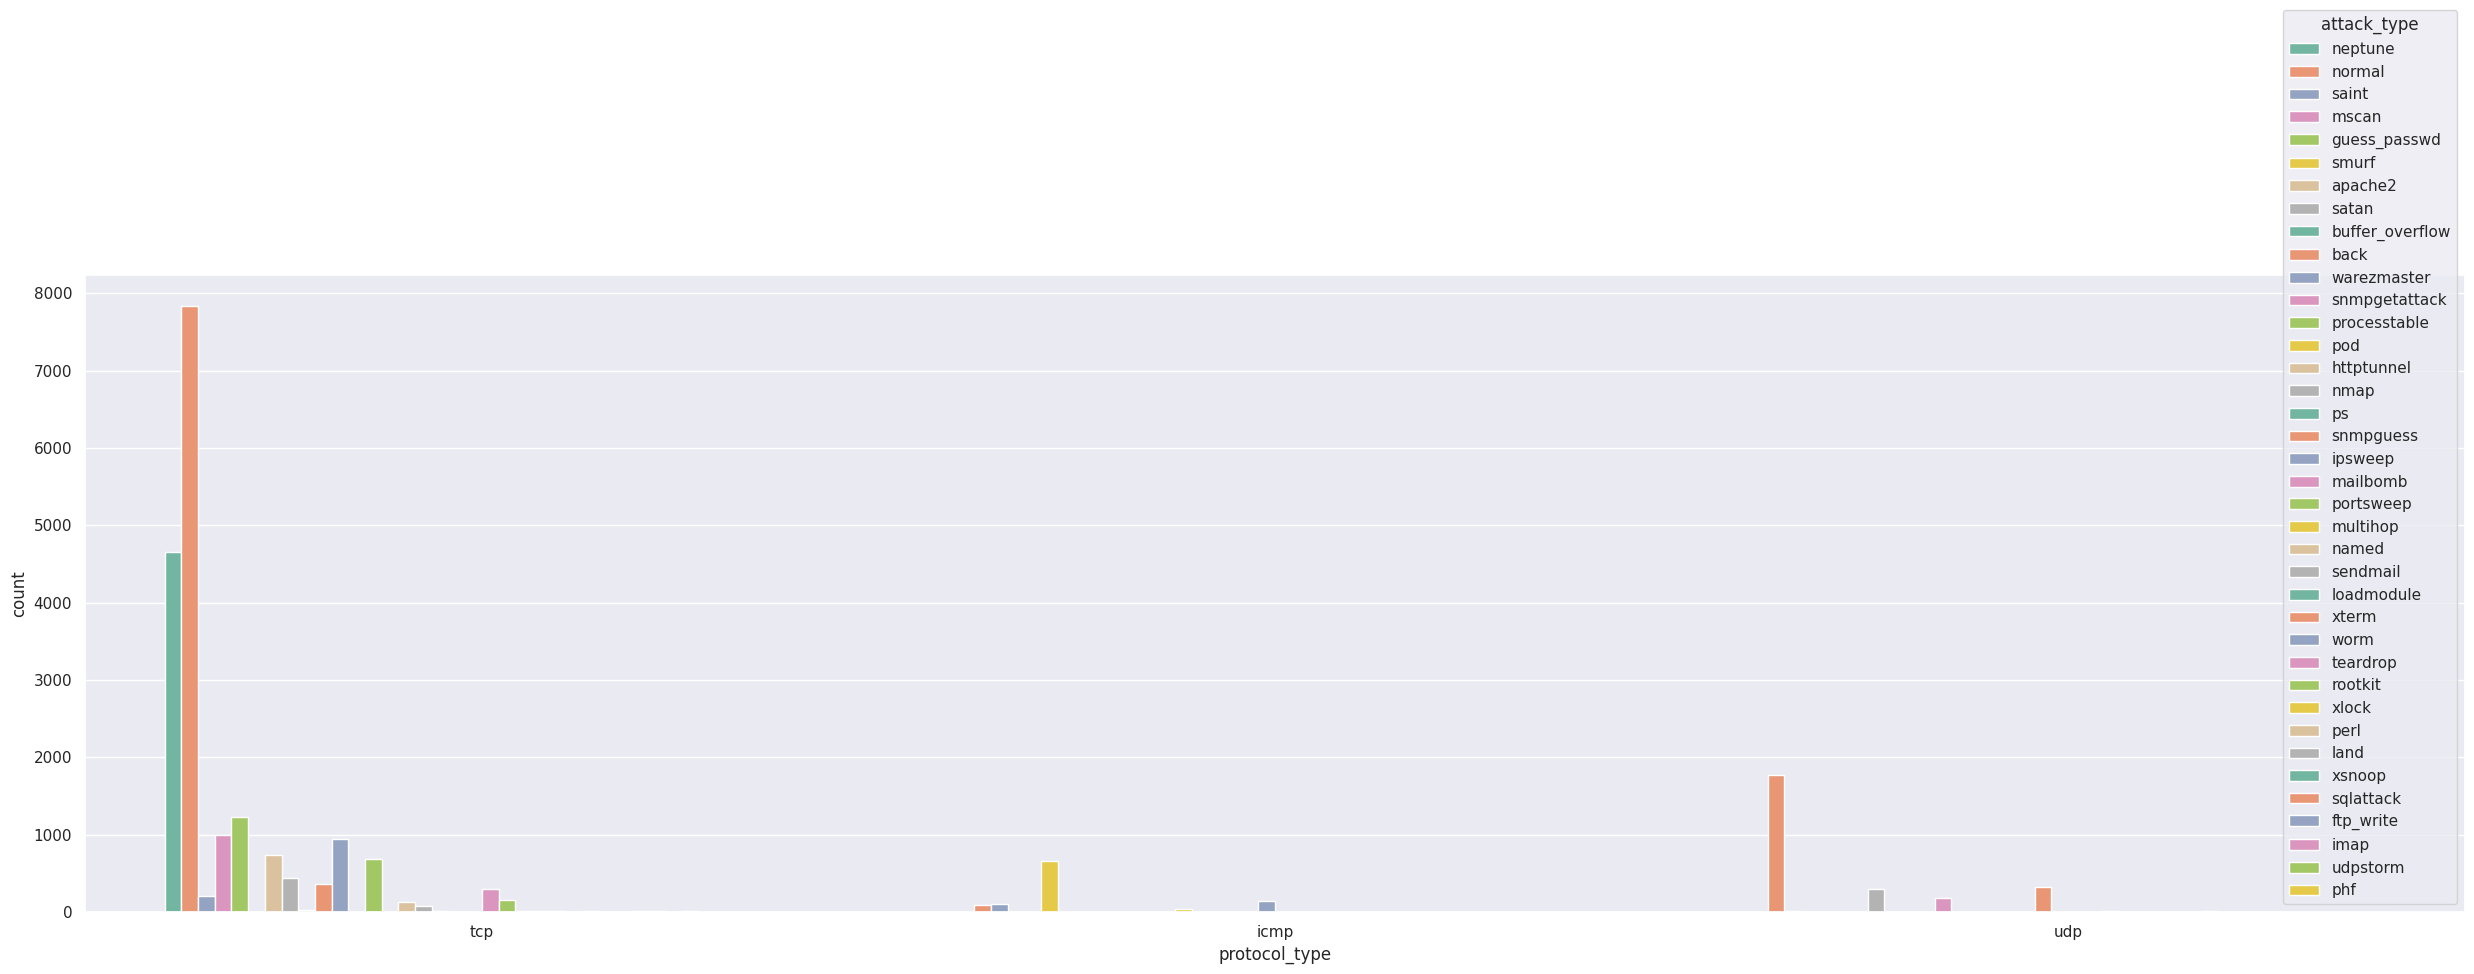

In [ ]:
# Observation: In the test]:



sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30.7,8.27)})
sns.countplot(x='protocol_type',hue="attack_type",data=df_test,palette = "Set2")

## Observation: In the test dataset we can observe the same distribution. The protocol type "tcp" covers majority of the dataset with maximum distribution of attack type "normal" followed by "neptune".

<Axes: xlabel='attack_type', ylabel='logged_in'>

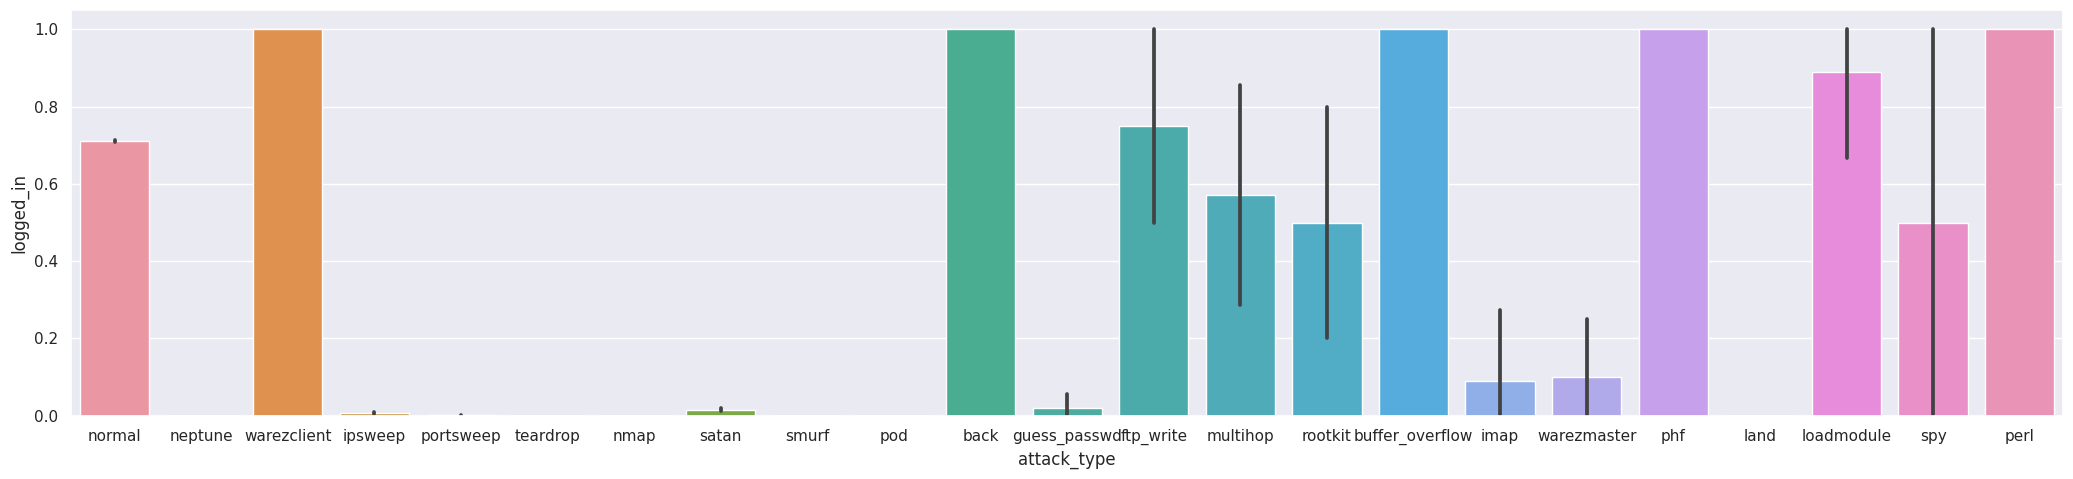

In [ ]:
# ## 5. Plot between logged_in and attack type


sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,5.27)})
sns.barplot(x='attack_type',y='logged_in',data=df_train)


# Observation: From the above plot we can see that the logged in feature is distributed among multiple attack types. Our feature is binarry where both the classes are almost equally distributed, we can see that attack type "warezclient","back","overflow" and "phf" are all covering the logged in value 1. We will visualize the same for test dataset.





<Axes: xlabel='attack_type', ylabel='logged_in'>

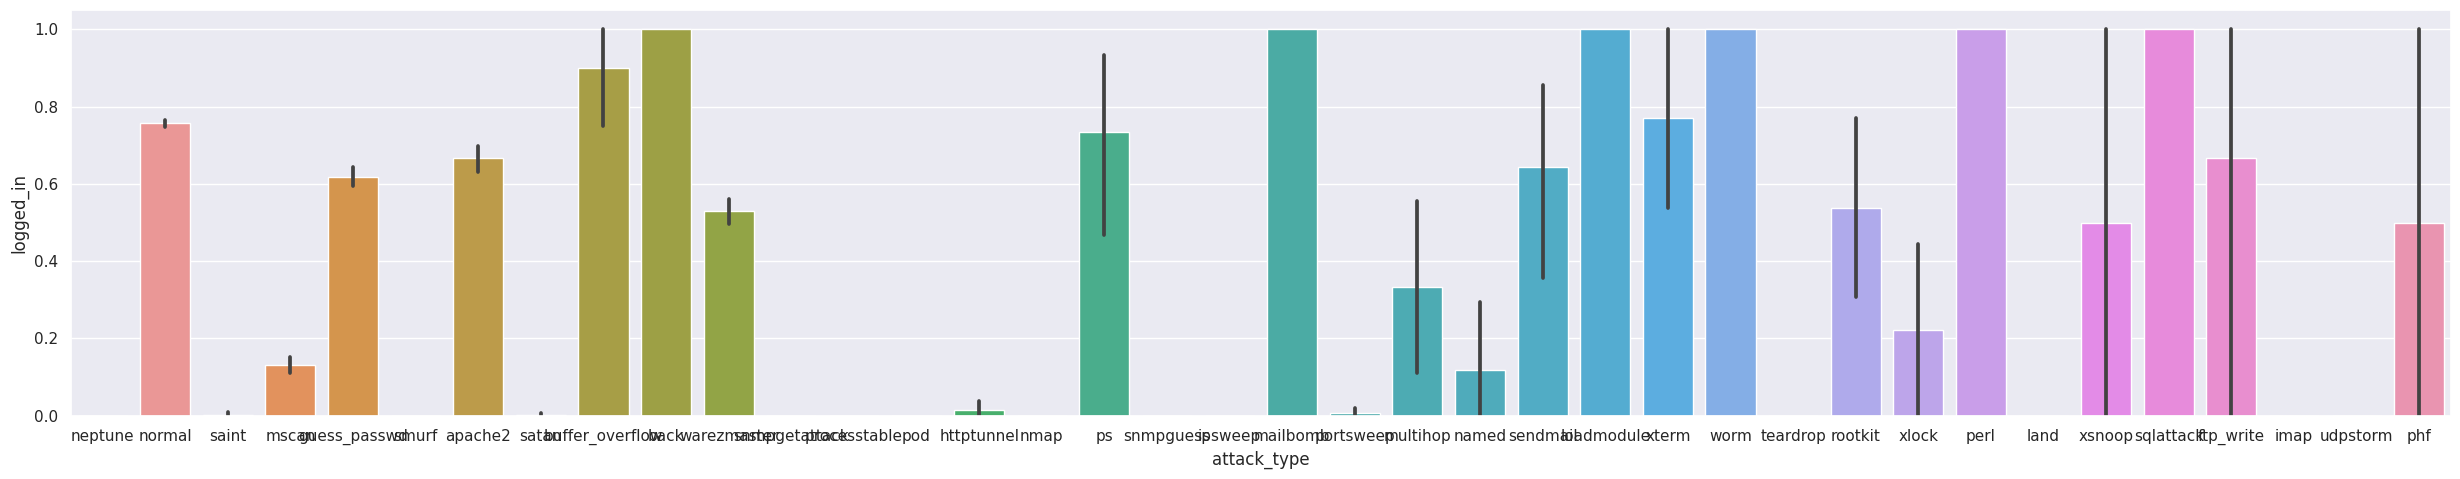

In [ ]:

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30.7,5.27)})
sns.barplot(x='attack_type',y='logged_in',data=df_test)


# Observation: The same distribution of attack types can be observed from the test dataset as well.


<Axes: xlabel='flag', ylabel='count'>

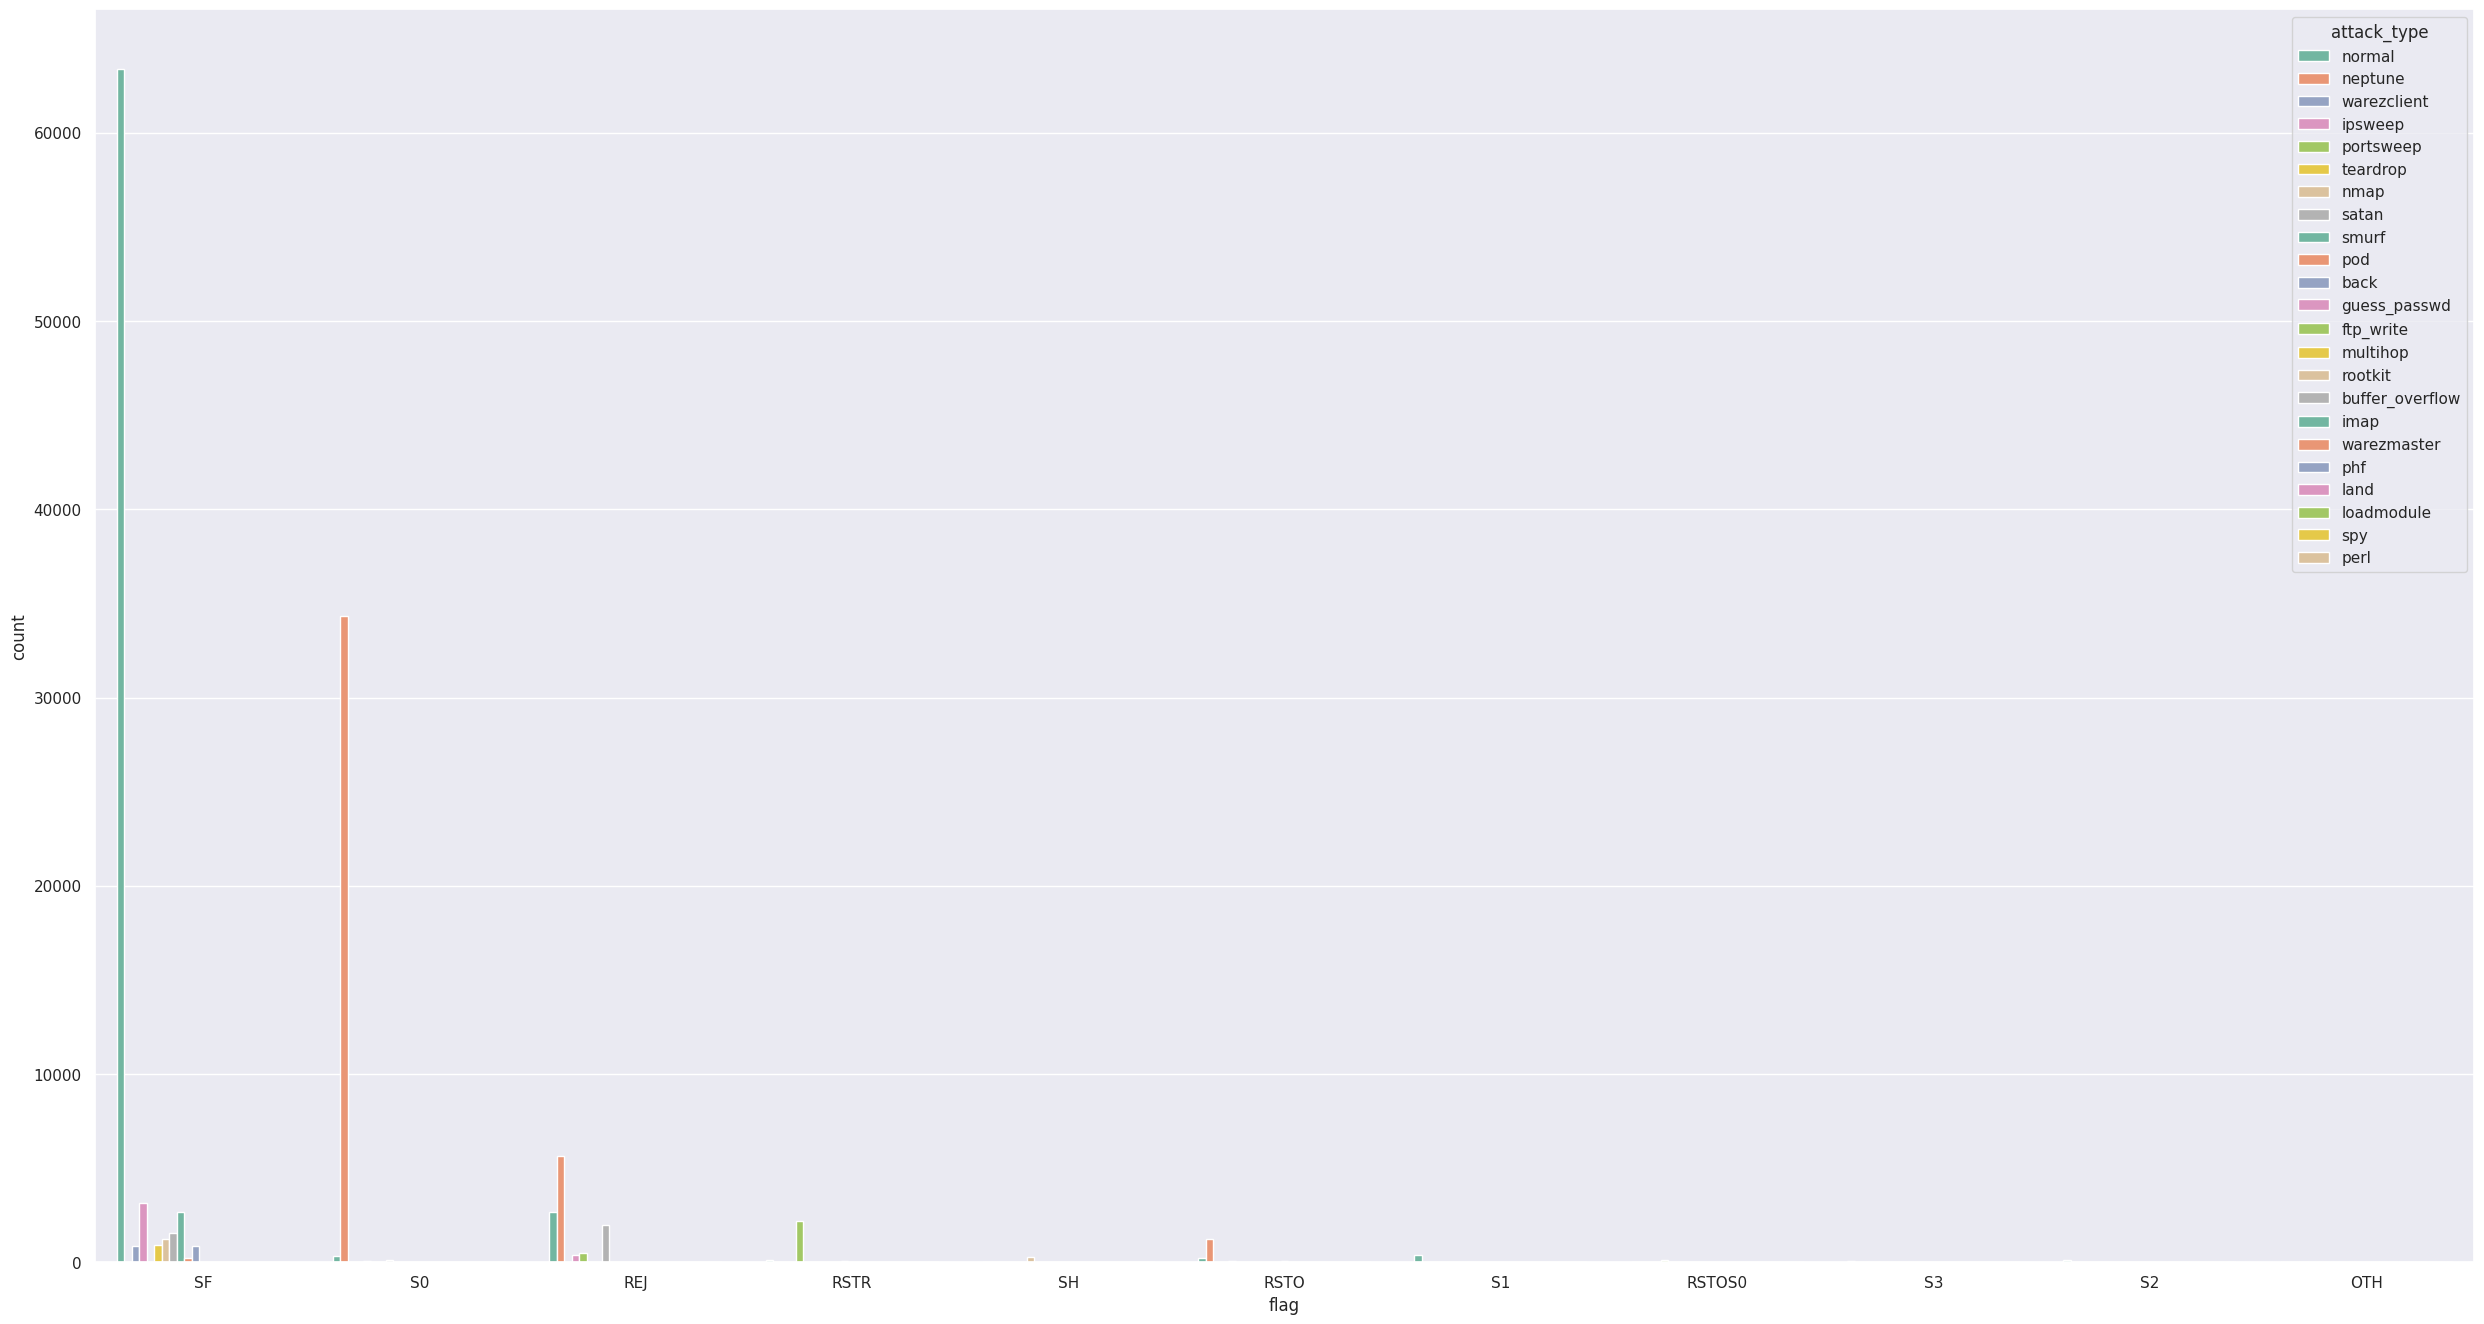

In [ ]:
# ## 6. Plot between flag and attack type

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30.7,16.27)})
sns.countplot(x='flag',hue="attack_type",data=df_train,palette = "Set2")


# Observation: From the above plot we can say that the flag type "SF" covers the majority of the distribution followed by "SO" and "REJ". Attack type "normal" covers majority of the datapoints with falg type "SF". We will visualize the same for test dataset.



<Axes: xlabel='flag', ylabel='count'>

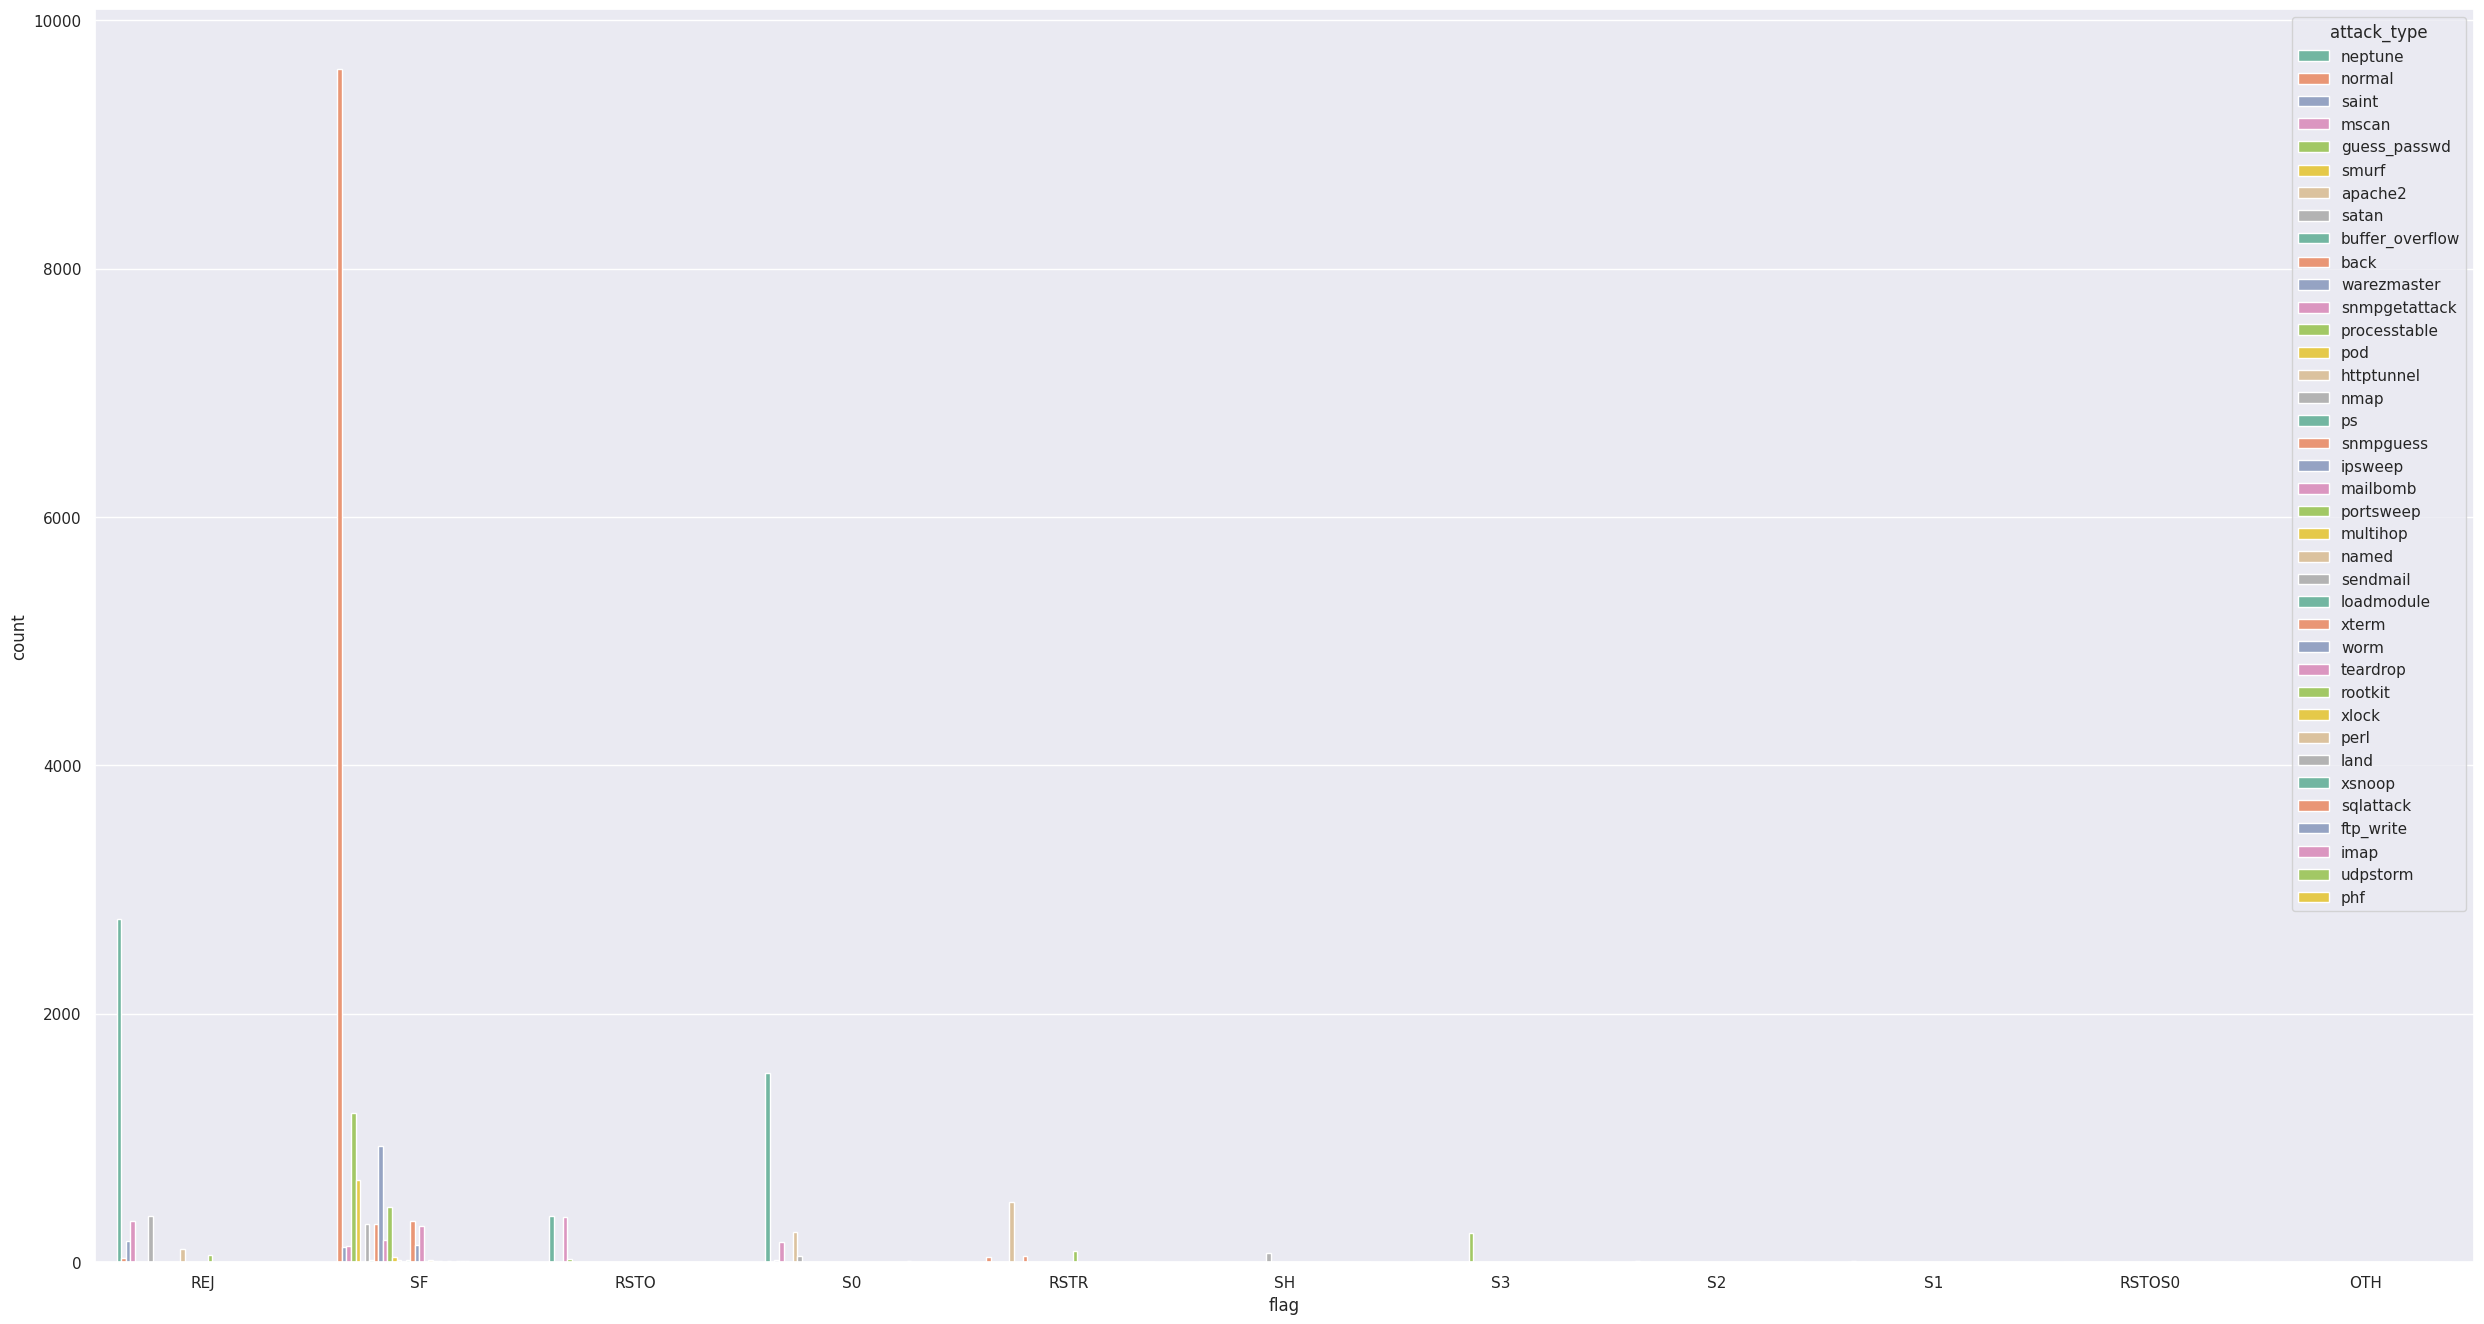

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30.7,16.27)})
sns.countplot(x='flag',hue="attack_type",data=df_test,palette = "Set2")


# Observation : The test dataset also follows the same distribution as the train data with majority of datapoints belonging to flag type "SF".


<Axes: xlabel='attack_type', ylabel='Score'>

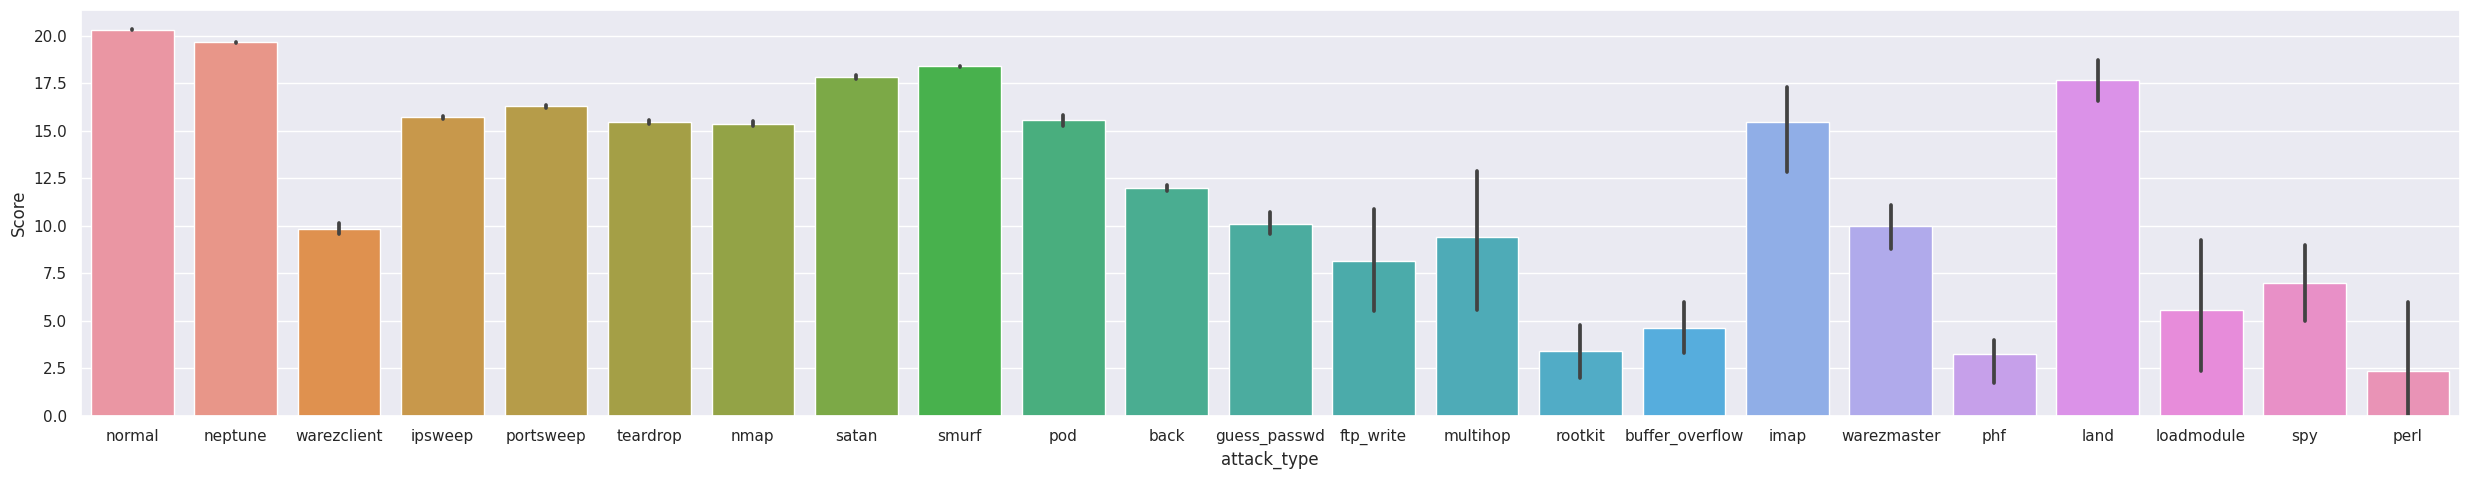

In [ ]:
# ## 7. Plot between score and attack type

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30.7,5.27)})
sns.barplot(x='attack_type',y='Score',data=df_train)


# Observation: From the above plot we can conclude that most of the attack types belongs to score value more than 15. We will check the same for test dataset as well.









<Axes: xlabel='attack_type', ylabel='Score'>

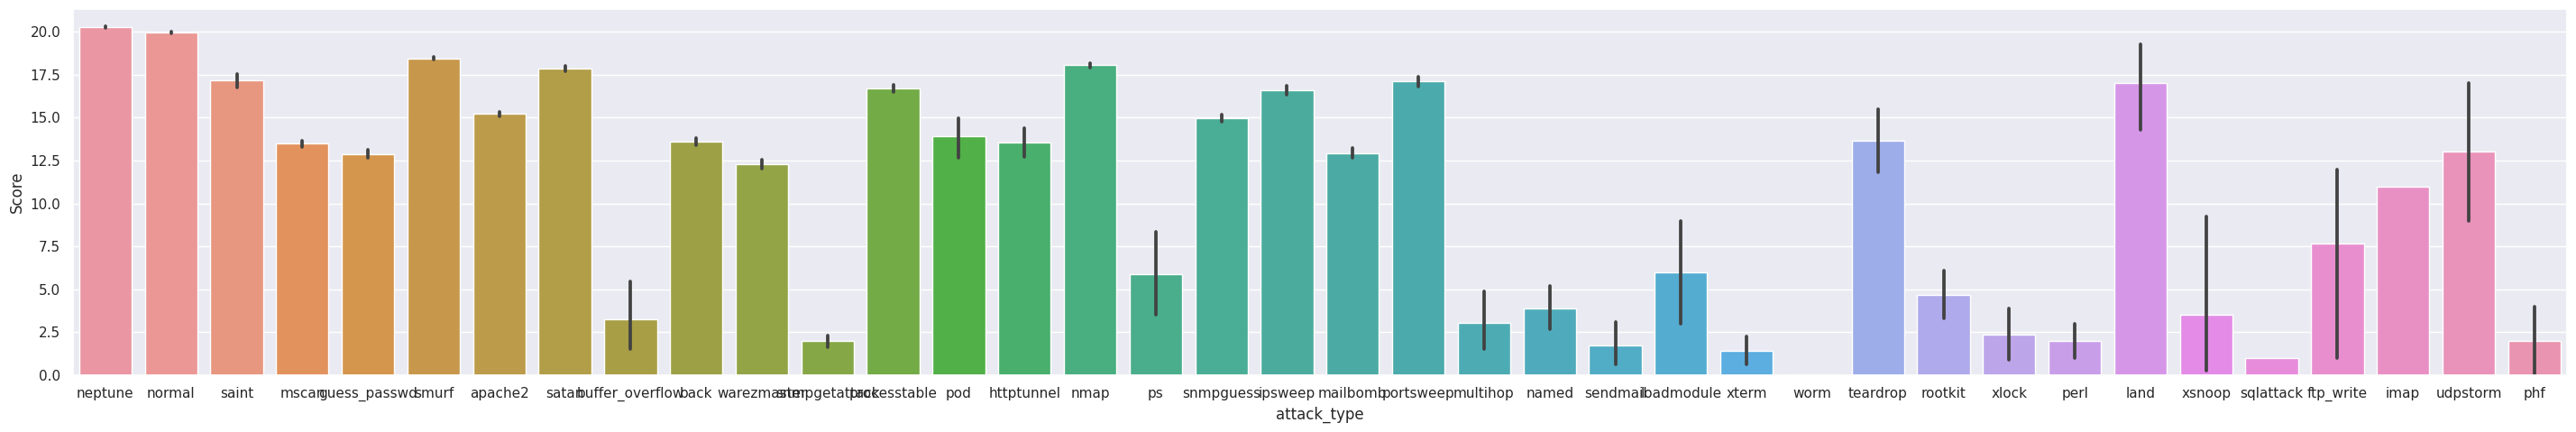

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(35.7,5.27)})
sns.barplot(x='attack_type',y='Score',data=df_test)


# Observation: The dataset follows the same distribution as train dataset.

<Axes: xlabel='attack_type', ylabel='count'>

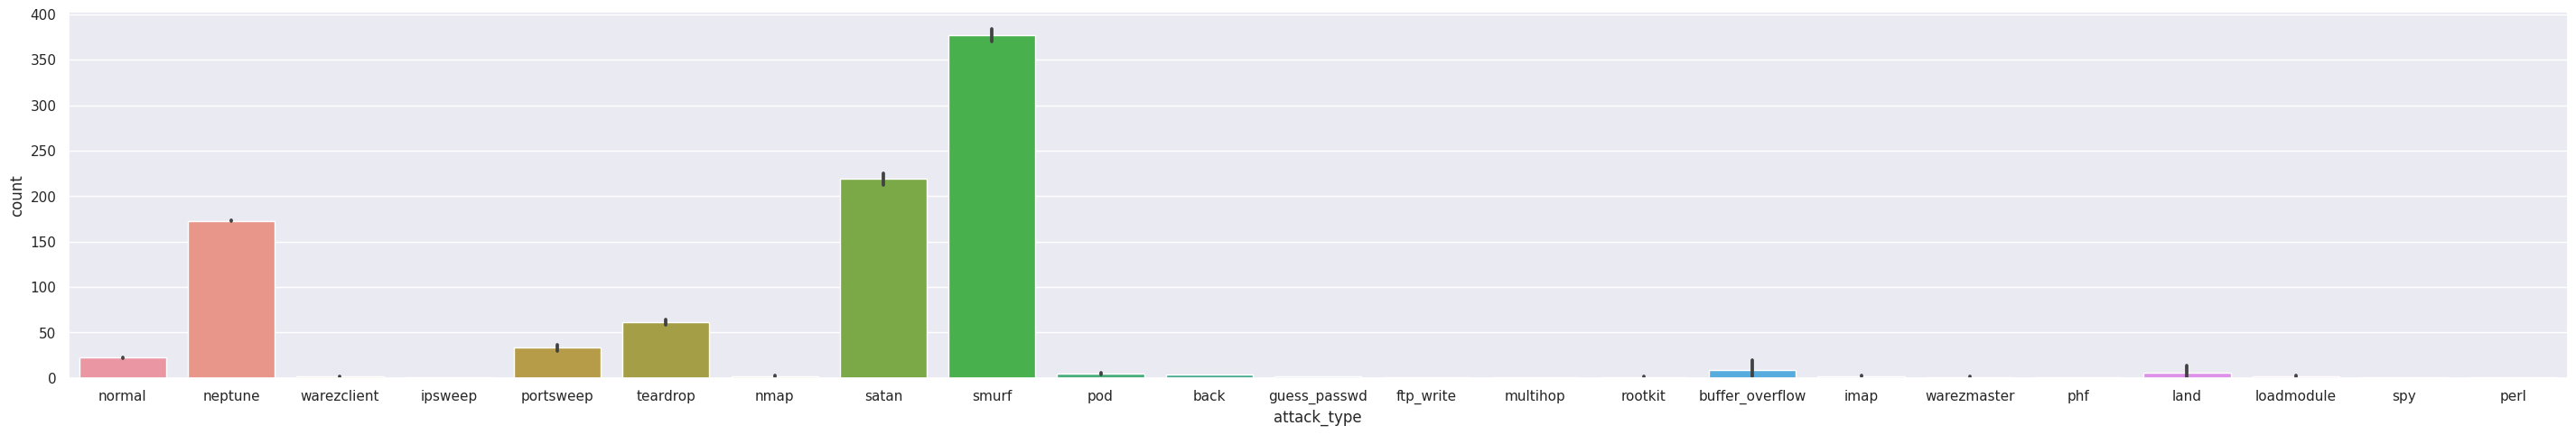

In [ ]:
## 8. Plot between count and attack type

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(35.7,5.27)})
sns.barplot(x='attack_type',y='count',data=df_train)


# Observation: From the above plot we can see that most of the attack types belongs to count value of less than 5. Attack type "smurf" belongs to count value greater than 350 followed by "neptune".




<Axes: xlabel='attack_type', ylabel='count'>

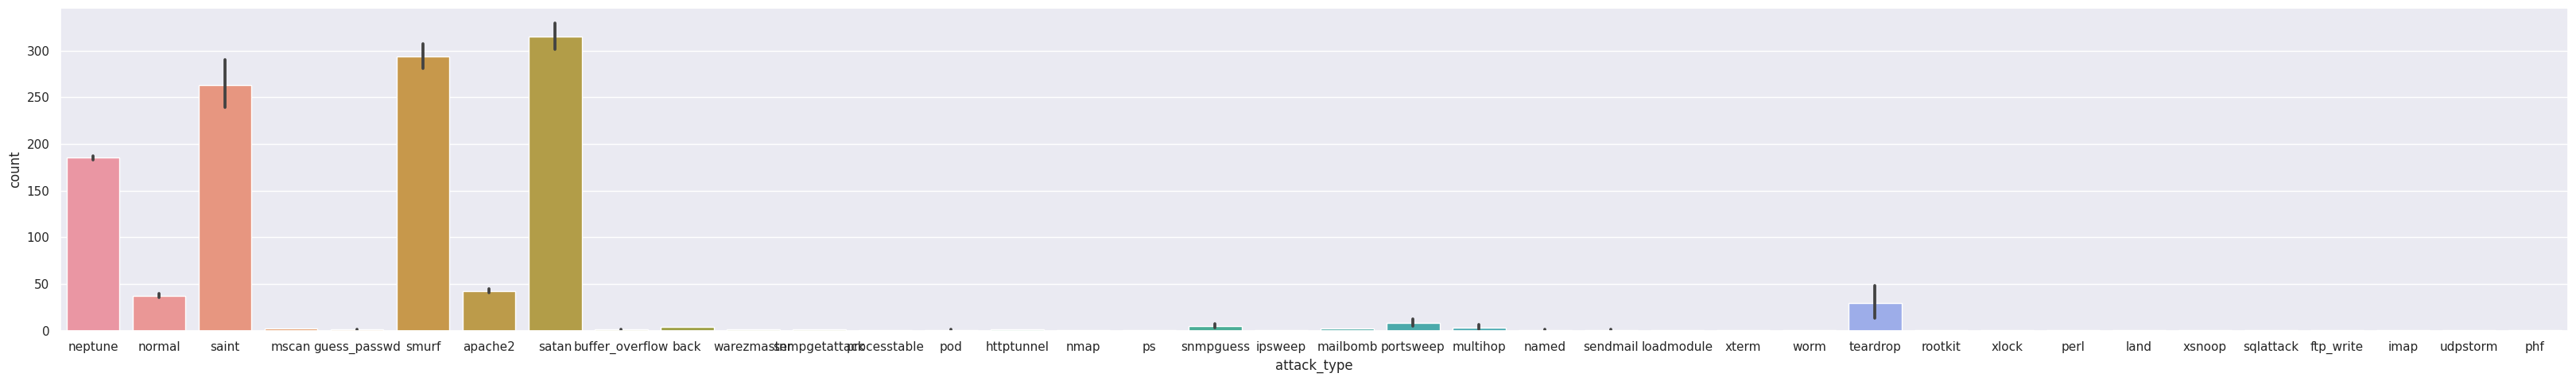

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(40.7,5.27)})
sns.barplot(x='attack_type',y='count',data=df_test)


# Observation: The test data follows a different distribution for feature "count". The attack type "satan buffer" covers the highest count values(>300) followed by "smurf","saint","neptune".


,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,...,is_guest_login,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
Duration,1.000000,0.137743,0.450609,0.405342,0.164407,0.135033,0.000000,0.000000,0.015780,0.104382,...,0.137206,0.592465,0.298200,0.033399,0.110079,0.140700,0.233072,0.240959,0.410612,0.328373
protocol_type,0.137743,1.000000,0.986618,0.427788,0.000000,0.000000,0.003250,0.481678,0.000000,0.039577,...,0.333489,0.276879,0.589328,0.590744,0.334486,0.332243,0.203144,0.210402,0.839022,0.493724
service,0.450609,0.986618,1.000000,0.692821,0.017733,0.000000,0.139223,0.406253,0.050499,0.603425,...,0.815051,0.560429,0.682359,0.687488,0.626868,0.633223,0.415572,0.428705,0.857744,0.610648
flag,0.405342,0.427788,0.692821,1.000000,0.181184,0.040010,0.021895,0.093140,0.000000,0.053099,...,0.542758,0.466461,0.339359,0.208443,0.648644,0.682778,0.627790,0.654591,0.802958,0.337941
src_bytes,0.164407,0.000000,0.017733,0.181184,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007222,0.024774,0.008196,0.000000,0.018050,0.068280,0.022896,0.072944,0.029345,0.084673
dest_bytes,0.135033,0.000000,0.000000,0.040010,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.053766,0.011117,0.000000,0.000000,0.000000,0.011239,0.008128,0.035515,0.096407
Land,0.000000,0.003250,0.139223,0.021895,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.013003,0.000000,0.048302,0.135280,0.028235,0.129478,0.000000,0.000000,0.904487,0.101963
wrong_fragment,0.000000,0.481678,0.406253,0.093140,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.223740,0.123192,0.236966,0.093763,0.130825,0.068645,0.240024,0.040146,0.991632,0.310151
Urgent packets,0.015780,0.000000,0.050499,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.006526,0.016682,0.009224,0.182103,0.000000,0.000000,0.000000,0.000000,0.309222,0.065128
hot,0.104382,0.039577,0.603425,0.053099,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.165062,0.022226,0.023740,0.000000,0.081732,0.104588,0.020160,0.066959,0.340919,0.188387


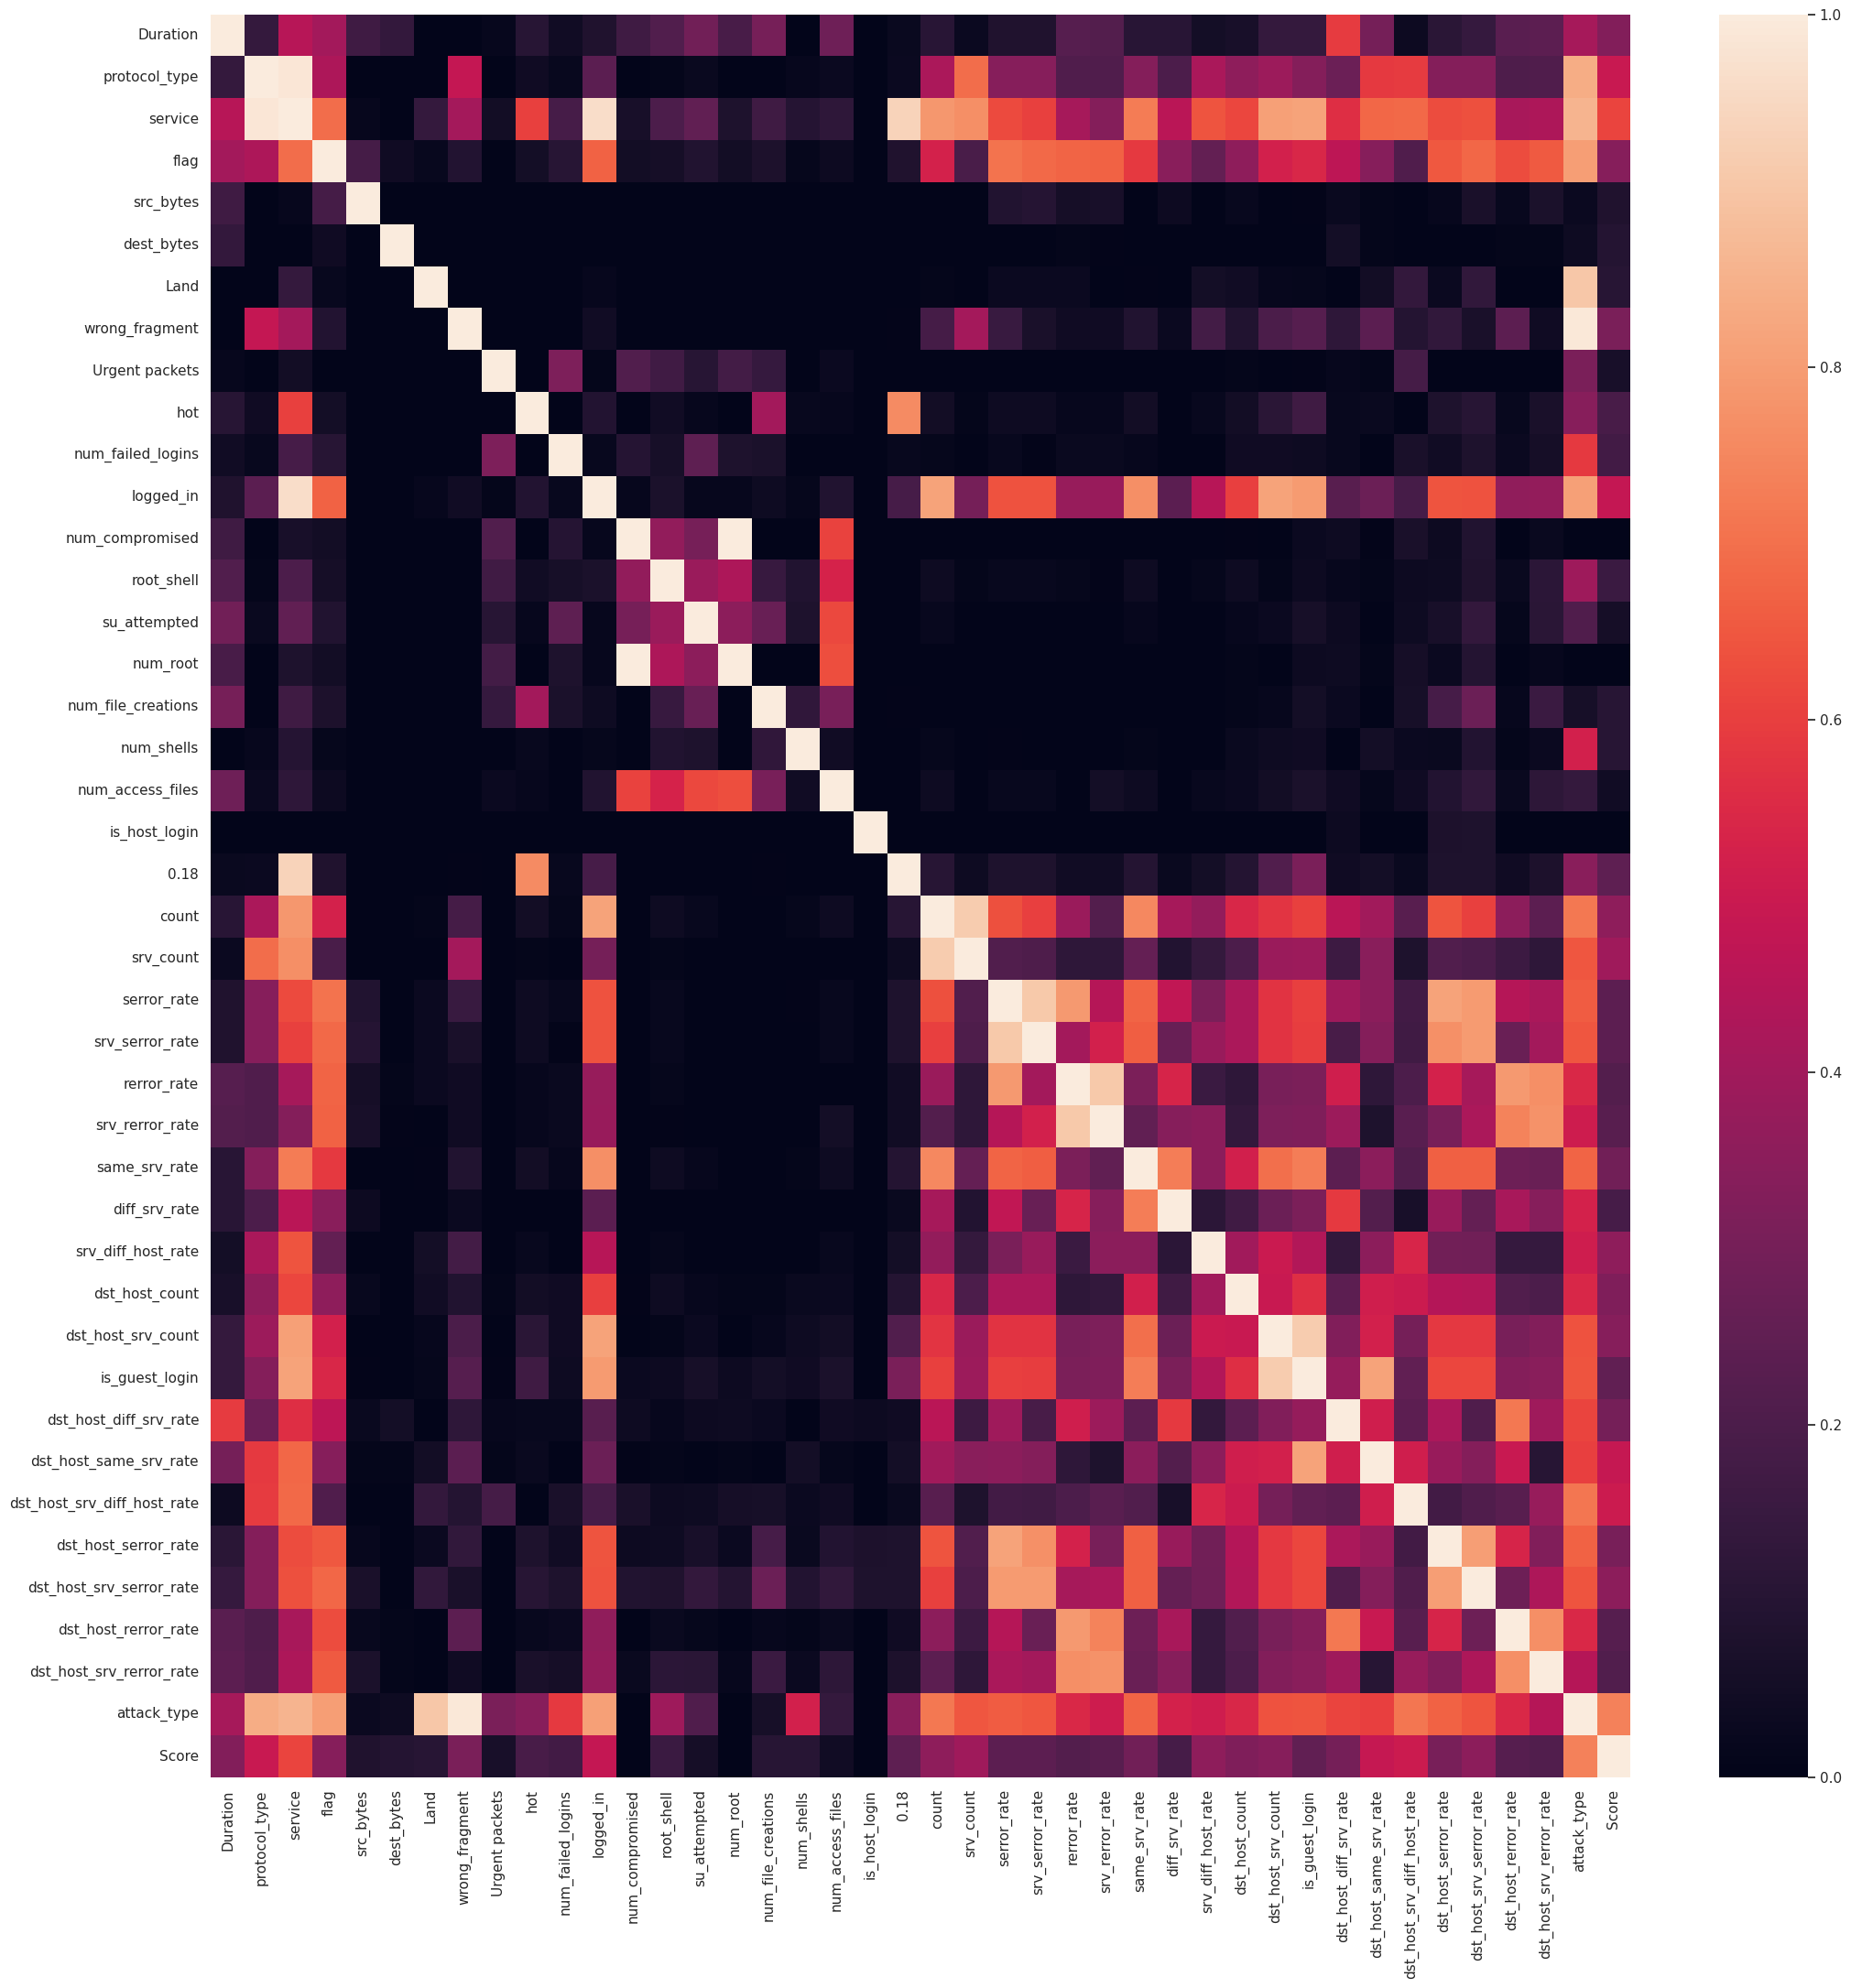

In [ ]:
# # Bivariate Analysis

# # Next we will check the correlation between different columns using heatmap


sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(corr_matrix);

corr_matrix


# Observation: We can figure out the features which are strongly correlated with each other from the above matrix:
# 1. Protocol type and Service are highly correlated.
# 2. is_guest_login and Service are highly correlated.
# 3. dst_host_same_srv_rate and Service are highly correlated.
# 4. Count and logged_in are correlated.
# 5. num_compromised and num_root are highly correlated.
# 6. dst_host_same_srv_rate and dst_host_srv_count are highly correlated.




<Axes: xlabel='dest_bytes'>

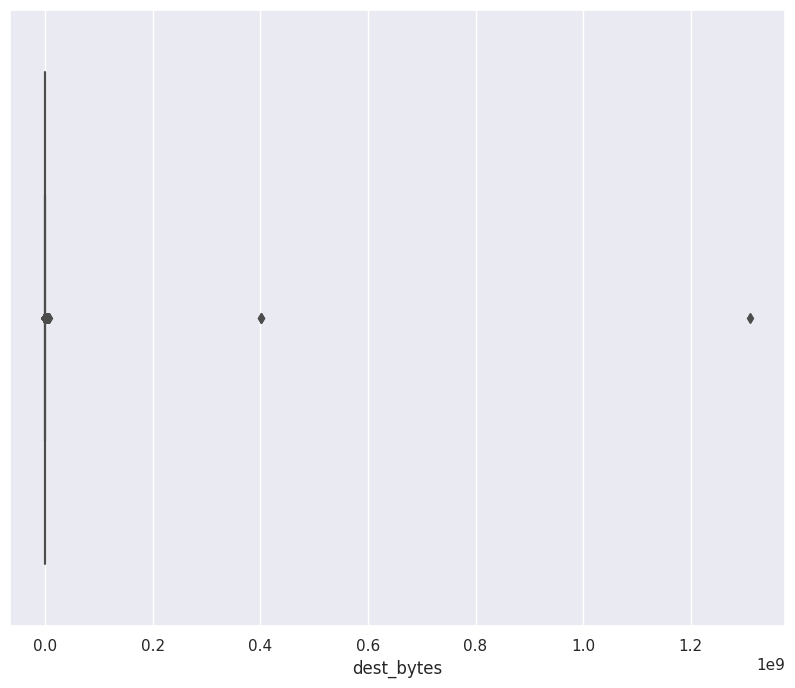

In [ ]:
# # Plotting box plot for few of the features to check for outliers.
# 1. Destination Bytes

sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x=df_train['dest_bytes'])


# The above box plot is highly skewed and also there are outliers in our data.


<Axes: xlabel='hot'>

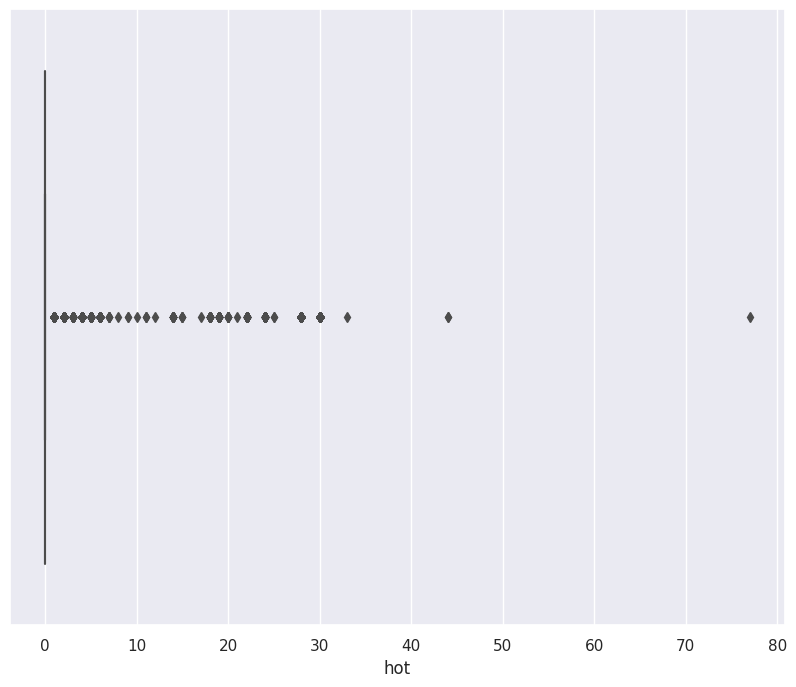

In [ ]:
# 2. Hot

# In[ ]:


sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x=df_train['hot'])


# We can observe a lot of outliers for this feature.

<Axes: xlabel='count'>

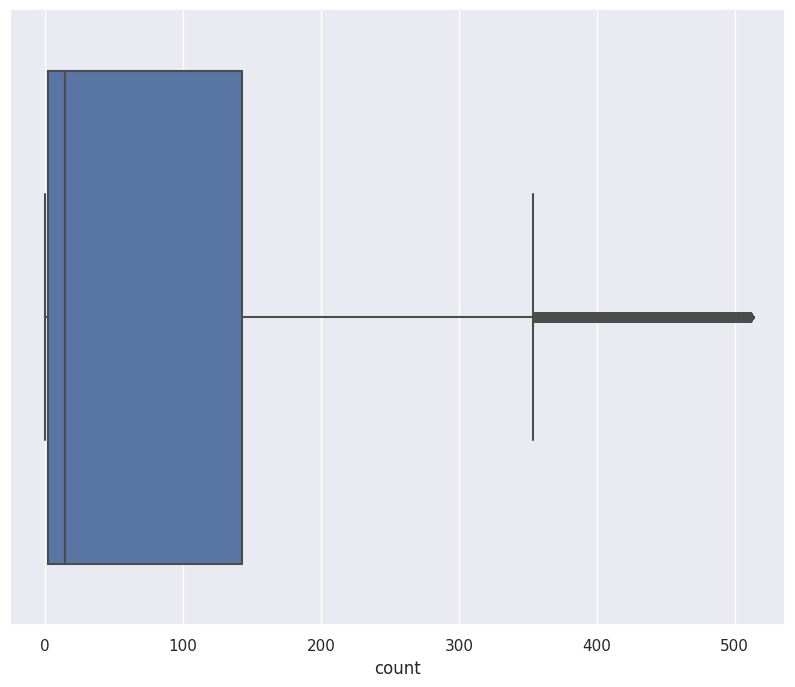

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x=df_train['count'])


# The data ranges between 0 and 350. Anything apart from that can be considered as outlier

In [ ]:
# # Applying TSNE algorithm to check the distribution of data in lower dimensional space.

X = df_train.drop(['attack_type','Score','protocol_type','service','flag'], axis=1)
y=df_train['attack_type']
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, stratify = y, random_state=100)


In [ ]:
y_train.value_counts()/len(y_train)

normal             0.534576
neptune            0.327168
satan              0.028836
ipsweep            0.028568
portsweep          0.023269
smurf              0.021007
nmap               0.011848
back               0.007591
teardrop           0.007085
warezclient        0.007065
pod                0.001598
guess_passwd       0.000417
buffer_overflow    0.000238
warezmaster        0.000159
land               0.000139
imap               0.000089
rootkit            0.000079
loadmodule         0.000069
multihop           0.000060
ftp_write          0.000060
phf                0.000030
perl               0.000030
spy                0.000020
Name: attack_type, dtype: float64

In [ ]:
y_test.value_counts()/len(y_test)

normal             0.534590
neptune            0.327168
satan              0.028855
ipsweep            0.028577
portsweep          0.023259
smurf              0.020996
nmap               0.011867
back               0.007581
warezclient        0.007065
teardrop           0.007065
pod                0.001588
guess_passwd       0.000437
buffer_overflow    0.000238
land               0.000159
warezmaster        0.000159
ftp_write          0.000079
loadmodule         0.000079
imap               0.000079
rootkit            0.000079
multihop           0.000040
phf                0.000040
Name: attack_type, dtype: float64

In [ ]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_scaled = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [ ]:
color_dict = dict({'normal': 'blue', 'neptune': 'orange','satan': 'yellow','ipsweep':'snow','portsweep':'black','smurf':'red','nmap':'aqua','back':'indigo',
                   'teardrop':'wheat','warezclient':'purple','pod':'slateblue','guess_passwd':'pink','buffer_overflow':'ivory',
                   'warezmaster':'maroon','land':'brown','imap':'cyan','rootkit':'olive',
                   'loadmodule':'lavender','ftp_write':'dimgrey','multihop':'royalblue','phf':'lime','perl':'seagreen','spy':'bisque'})

In [ ]:
# Feature Dimention Reduction by LDA or Is it a Classifier


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=3)
lda_result = lda.fit_transform(X_scaled,y)

df_train['lda1']=lda_result[:, 0]
df_train['lda2']=lda_result[:, 1]
df_train['lda3']=lda_result[:, 2]



plt.figure(figsize=(16,10))
sns.scatterplot(
    x="lda1", y="lda2",
     hue="attack_type",
    palette=color_dict,
    data=df_train,
    legend="full",

    alpha=0.3
)

In [ ]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

In [ ]:
df_train['tsne1']=tsne_repr[:, 0]

In [ ]:
df_train['tsne2']=tsne_repr[:, 1]

In [ ]:
color_dict = dict({'normal': 'blue', 'neptune': 'orange','satan': 'yellow','ipsweep':'snow','portsweep':'black','smurf':'red','nmap':'aqua','back':'indigo',
                   'teardrop':'wheat','warezclient':'purple','pod':'slateblue','guess_passwd':'pink','buffer_overflow':'ivory',
                   'warezmaster':'maroon','land':'brown','imap':'cyan','rootkit':'olive',
                   'loadmodule':'lavender','ftp_write':'dimgrey','multihop':'royalblue','phf':'lime','perl':'seagreen','spy':'bisque'})


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="attack_type",
    palette=color_dict,
    data=df_train,
    legend="full",

)

In [ ]:
df_train=df_train.drop(['tsne1','tsne2'],axis=1)

In [ ]:
# ## Applying PCA on the dataset


pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)


In [ ]:
df_train['pca1']=pca_result[:, 0]
df_train['pca2']=pca_result[:, 1]
df_train['pca3']=pca_result[:, 2]


In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca1", y="pca2",
    hue="attack_type",
    palette=color_dict,
    data=df_train,
    legend="full",
    alpha=0.3
)


# Observation:From PCA as well we can say that the class label normal and neptune are seperable in lower dimension space however other classes are overlapping..


In [ ]:
df_train=df_train.drop(['pca1','pca2','pca3'],axis=1)

In [ ]:
attack_sep={'normal':"Normal",'neptune':"DOS",
            'satan':"Probe",'ipsweep':"Probe",'named':"R2L",
            'ps':"U2R",'sendmail':"R2L",'xterm':"U2R",'xlock':"R2L",
            'xsnoop':"R2L",'udpstorm':"DOS",'sqlattack':"U2R",'worm':"DOS",'portsweep':"Probe",
            'smurf':"DOS",'nmap':"Probe",'back':"DOS",'mscan':"Probe",'apache2':"DOS",'processtable':"DOS",
            'snmpguess':"R2L",'saint':"Probe",'mailbomb':"DOS",'snmpgetattack':"R2L",'httptunnel':"R2L",'teardrop':"DOS",
            'warezclient':"R2L",'pod':"DOS",'guess_passwd':"R2L",'buffer_overflow':"U2R",'warezmaster':"R2L",'land':"DOS",'imap':"R2L",
            'rootkit':"U2R",'loadmodule':"U2R",'ftp_write':"R2L",'multihop':"R2L",'phf':"R2L",'perl':"U2R",'spy':"R2L"}




In [ ]:
df_train.replace({'attack_type':attack_sep},inplace=True)

df_test.replace({'attack_type':attack_sep},inplace=True)


In [ ]:
# # Lets train a base model on the entire dataset and evaluate the performance.

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df_train['protocol_type']= label_encoder.fit_transform(df_train['protocol_type'])
df_test['protocol_type']= label_encoder.fit_transform(df_test['protocol_type'])

label_encoder = preprocessing.LabelEncoder()

df_train['service']= label_encoder.fit_transform(df_train['service'])
df_test['service']= label_encoder.transform(df_test['service'])

label_encoder = preprocessing.LabelEncoder()

df_train['flag']= label_encoder.fit_transform(df_train['flag'])
df_test['flag']= label_encoder.transform(df_test['flag'])


In [ ]:

y=df_train['attack_type']
X=df_train.drop(['attack_type'],axis=1)

y_test=df_test['attack_type']
X_test=df_test.drop(['attack_type'],axis=1)

In [ ]:
sc = StandardScaler()  #standardizing the data
X_train = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [ ]:
# # Lets build a base model on our dataset

def falseposrate(conf_matrix,y_test,pred):
  FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
  FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
  TP = np.diag(conf_matrix)
  TN = conf_matrix.sum() - (FP + FN + TP)
  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)
  FPR = FP/(FP+TN)
  recall = recall_score(y_test, pred,average='micro')
  precision = precision_score(y_test, pred,average='micro')
  return FPR,recall,precision

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
clf= svm.SVC(kernel='linear',probability=True)
clf.fit(X_train,y)




In [ ]:
pred = clf.predict(X_test)
recall = recall_score(y_test, pred,average='micro')
precision = precision_score(y_test, pred,average='micro')
score = metrics.accuracy_score(y_test, pred)
f1score= f1_score(y_test, pred, average='micro')
print("Accuracy :",score)
print('=' * 50)
print("F1 score :",f1score)

cnf_matrix = confusion_matrix(y_test, pred)
#sns.heatmap(cnf_matrix)
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(clf, X_test, y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

print('_' * 50)
print(cnf_matrix)


In [ ]:
FPR=falseposrate(cnf_matrix,y_test,pred)
print('=' * 50)
print("|False positive Rate :|")
print('=' * 50)
print(FPR)
print('=' * 50)
print("|Precision:|")
print('=' * 50)
print(precision)
print('=' * 50)
print("|recall:|")
print('=' * 50)
print( recall)
print('=' * 50)
print("|Classification report|")
print('=' * 50)
print(metrics.classification_report(y_test,pred))

# Our model is giving 70% F1 score. Lets see if we can improve the performnace.

# # Lets try to improve our model performance.

In [ ]:
# # Lets apply some feature selection techniques on our datasets and analyze the performance.

# ## Coorelation based feature Selection( CFS)

In [ ]:
abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.5]

In [ ]:
# Lets look at the features which are highly correlated with each other.

new_df= df_train[relevant_features.index]
new_df_test= df_test[relevant_features.index]

In [ ]:
y_cfs=new_df['attack_type']
X_cfs=new_df.drop(['attack_type'],axis=1)

y_test_cfs=new_df_test['attack_type']
X_test_cfs=new_df_test.drop(['attack_type'],axis=1)

In [ ]:
sc = StandardScaler()
X_train_cfs = sc.fit_transform(X_cfs)

X_test_cfs = sc.transform(X_test_cfs)

In [ ]:
!pip3 install catboost
from catboost import CatBoostClassifier


In [ ]:
def training(clf,X_train,X_Test,y,y_test,attack_type):
    print('\n')
    print('=' * 50)
    print("Training ",'attack_type')
    print(clf)
    clf.fit(X_train, y)
    print('_' * 50)
    pred = clf.predict(X_Test)
    print('_' * 50)
    roc = roc_auc_score(y_test, clf.predict_proba(X_Test), multi_class='ovo', average='weighted')
    score = metrics.accuracy_score(y_test, pred)


    f1score= f1_score(y_test, pred, average='micro')
    print("accuracy:   %0.3f" % score)
    print()
    print('_' * 50)
    print("|classification report|")
    print('_' * 50)
    print(metrics.classification_report(y_test, pred))
    print('_' * 50)
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))
    cm= metrics.confusion_matrix(y_test, pred)
    print()
    print('_' * 50)
    print("ROC AUC Score :",roc)
    FPR,precision,recall= falseposrate(cm,y_test_cfs,pred)
    print('_' * 50)
    print("False Positive Rate is :",FPR)
    clf_descr = str(clf).split('(')[0]
    return clf_descr,score, f1score,FPR,precision,recall




In [ ]:
training(clf,X_train,X_test,y,y_test,'CFS')

In [ ]:
results_CFS= []

In [ ]:
for clf, name in (
        (GaussianNB() ,"Naive Bayes"),
        (KNeighborsClassifier(n_neighbors = 7),"KNN"),
        (OneVsRestClassifier(svm.SVC(probability=True)),"One vs Rest SVM "),
        (RandomForestClassifier(), "Random forest"),(DecisionTreeClassifier(random_state=0),"Decision Tree"),
        (XGBClassifier(),"XGBOOST"),(svm.SVC(kernel='linear',probability=True),"SVM Linear"),
        (CatBoostClassifier(iterations=5,learning_rate=0.1),"CAT Boost")):
  print('=' * 80)
  print(name)



results_CFS.append(training(clf,X_train_cfs,X_test_cfs,y_cfs,y_test_cfs, 'CFS'))

In [ ]:
results_total= []

for clf, name in (
        (GaussianNB() ,"Naive Bayes"),
        (KNeighborsClassifier(n_neighbors = 7),"KNN"),
        (OneVsRestClassifier(svm.SVC(probability=True)),"One vs Rest SVM "),
        (RandomForestClassifier(), "Random forest"),(DecisionTreeClassifier(random_state=0),"Decision Tree"),
        (XGBClassifier(),"XGBOOST"),
        (CatBoostClassifier(iterations=5,learning_rate=0.1),"CAT Boost")):
    print('=' * 80)
    print(name)
    results_total.append(training(clf,X_train,X_test,y,y_test,"Total"))

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
indices = np.arange(len(results_total))

results = [[x[i] for x in results_total] for i in range(7)]

clf_names, score,f1score, auc,fpr1,precision,recall = results
plt.figure(figsize=(15, 10))
plt.title("Evaluation of CFS")
plt.barh(indices+.3, f1score, .1, label="f1_score", color='red')
plt.barh(indices+.6, recall, .1, label="Recall", color='blue')
plt.barh(indices+.8, auc, .1, label="AUC", color='c')
plt.barh(indices+.10, score, .1, label="Accuracy", color='darkorange')
plt.barh(indices+.12, precision, .1, label="precision", color='c')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)

plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
  if c == '<catboost.core.CatBoostClassifier object at 0x7fbf12ccd048>':
    plt.text(-.4, i, 'catboost')
  else:

    plt.text(-.4, i, c)

plt.show()
dic={}
auc_dic={}
f1_dic={}
rec={}
prec={}
fpr_={}
for key in clf_names:
    for value in score:
        dic[key] = value
        score.remove(value)
        break

for key in clf_names:
    for value in f1score:
        f1_dic[key] = value
        f1score.remove(value)
        break

for key in clf_names:
    for value in auc:
        auc_dic[key] = value
        auc.remove(value)
        break
for key in clf_names:
    for value in recall:
        rec[key] = value
        recall.remove(value)
        break

for key in clf_names:
    for value in precision:
        prec[key] = value
        precision.remove(value)
        break
for key in clf_names:
    for value in fpr1:
        fpr_[key] = value
        fpr1.remove(value)
        break
print("accuracy for Total",)
print(dic)
print("="*300)
print(" auc score ",)
print(auc_dic)
print("="*300)
print("F1 score ",)
print(f1_dic)
print("="*300)
print("Recall ",)
print(rec)
print("="*300)
print("Precision ",)
print(prec)
print("="*300)
print("FPR")
print(fpr_)

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
indices = np.arange(len(results_CFS))

results = [[x[i] for x in results_CFS] for i in range(7)]

clf_names, score,f1score, auc,fpr2,precision,recall = results
plt.figure(figsize=(15, 10))
plt.title("Evaluation of CFS")
plt.barh(indices+.3, f1score, .1, label="f1_score", color='red')
plt.barh(indices+.6, recall, .1, label="Recall", color='blue')
plt.barh(indices+.8, auc, .1, label="AUC", color='c')
plt.barh(indices+.10, score, .1, label="Accuracy", color='darkorange')
plt.barh(indices+.12, precision, .1, label="precision", color='c')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)

plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
  if c == '<catboost.core.CatBoostClassifier object at 0x7fbf12ccd048>':
    plt.text(-.4, i, 'catboost')
  else:

    plt.text(-.4, i, c)

plt.show()
dic={}
auc_dic={}
f1_dic={}
rec={}
prec={}
fpr_={}
for key in clf_names:
    for value in score:
        dic[key] = value
        score.remove(value)
        break

for key in clf_names:
    for value in f1score:
        f1_dic[key] = value
        f1score.remove(value)
        break

for key in clf_names:
    for value in auc:
        auc_dic[key] = value
        auc.remove(value)
        break
for key in clf_names:
    for value in recall:
        rec[key] = value
        recall.remove(value)
        break

for key in clf_names:
    for value in precision:
        prec[key] = value
        precision.remove(value)
        break
for key in clf_names:
    for value in fpr2:
        fpr_[key] = value
        fpr2.remove(value)
        break
print("accuracy for CFS",)
print(dic)
print("="*300)
print(" auc score ",)
print(auc_dic)
print("="*300)
print("F1 score ",)
print(f1_dic)
print("="*300)
print("Recall ",)
print(rec)
print("="*300)
print("Precision ",)
print(prec)
print("="*300)
print("FPR")
print(fpr_)

In [ ]:
# # Lets try other feature selection technique: Information Gain

res = mutual_info_classif(X, y, random_state=0)
print('MI for DOS',res)


get_ipython().run_line_magic('matplotlib', 'inline')
plt.figure(figsize=(20,15))
feature_importance=pd.Series(res,X.columns[0:len(X.columns)])
feature_importance.plot(kind='barh',color='green')
plt.title("MI for DOS")

plt.show()


In [ ]:
X_=X.drop(['Land','wrong_fragment','Urgent packets','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','srv_rerror_rate','Duration'],axis=1)








In [ ]:
X_test_=X_test.drop(['Land','wrong_fragment','Urgent packets','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','srv_rerror_rate','Duration'],axis=1)


In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
indices = np.arange(len(results_mi))

results = [[x[i] for x in results_mi] for i in range(7)]

clf_names, score,f1score, auc,fpr2,precision,recall = results
plt.figure(figsize=(15, 10))
plt.title("Evaluation of MI")
plt.barh(indices+.3, f1score, .1, label="f1_score", color='red')
plt.barh(indices+.6, recall, .1, label="Recall", color='blue')
plt.barh(indices+.8, auc, .1, label="AUC", color='c')
plt.barh(indices+.10, score, .1, label="Accuracy", color='darkorange')
plt.barh(indices+.12, precision, .1, label="precision", color='c')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)

plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
  if c == '<catboost.core.CatBoostClassifier object at 0x7fbf12ccd048>':
    plt.text(-.4, i, 'catboost')
  else:

    plt.text(-.4, i, c)

plt.show()
dic={}
auc_dic={}
f1_dic={}
rec={}
prec={}
fpr_={}
for key in clf_names:
    for value in score:
        dic[key] = value
        score.remove(value)
        break

for key in clf_names:
    for value in f1score:
        f1_dic[key] = value
        f1score.remove(value)
        break

for key in clf_names:
    for value in auc:
        auc_dic[key] = value
        auc.remove(value)
        break
for key in clf_names:
    for value in recall:
        rec[key] = value
        recall.remove(value)
        break

for key in clf_names:
    for value in precision:
        prec[key] = value
        precision.remove(value)
        break
for key in clf_names:
    for value in fpr2:
        fpr_[key] = value
        fpr2.remove(value)
        break
print("accuracy for MI",)
print(dic)
print("="*300)
print(" auc score ",)
print(auc_dic)
print("="*300)
print("F1 score ",)
print(f1_dic)
print("="*300)
print("Recall ",)
print(rec)
print("="*300)
print("Precision ",)
print(prec)
print("="*300)
print("FPR")
print(fpr_)





In [ ]:
# ## Tabulating my results

# In[ ]:


from tabulate import tabulate
print("="*50)
print("|Tabulated Result|")
print("="*50)
data = [[1, 'Gaussian NB', 0.44,0.82,0.44],
[2, 'K Nearest Neighbour', 0.77,0.81,0.77],
[3, 'OnevsRest Classifier', 0.78,0.88,0.78],
[4,'Random Forest', 0.76,0.93,0.76],
[5,'Decision Tree', 0.75,0.75,0.75],
[6,'XGB Classifier', 0.78,0.94,0.78],
[7,'Catboost Classifier', 0.82,0.93,0.82],

]
print("Report on Total Data")
print("="*80)
print (tabulate(data, headers=["S.No", "Classifier", "Accuracy","AUC"," F1 Score"],tablefmt="psql"))


data_1 = [[1, 'Gaussian NB', 0.57,0.90,0.57],
[2, 'K Nearest Neighbour', 0.78,0.82,0.78],
[3, 'OnevsRest Classifier', 0.79,0.87,0.79],
[4,'Random Forest', 0.78,0.93,0.78],
[5,'Decision Tree', 0.77,0.77,0.77],
[6,'XGB Classifier', 0.80,0.94,0.80],
[7,'Catboost Classifier', 0.76,0.93,0.76]]
print("Correlation based feature selection")
print("="*80)
print (tabulate(data_1, headers=["S.No", "Classifier", "Accuracy","AUC","F1 Score"],tablefmt="psql"))




data_2 = [[1, 'Gaussian NB', 0.71,0.87,0.71],
[2, 'K Nearest Neighbour', 0.79,0.82,0.79],
[3, 'OnevsRest Classifier', 0.79,0.88,0.79],
[4,'Random Forest', 0.77,0.94,0.77],
[5,'Decision Tree', 0.76,0.76,0.76],
[6,'XGB Classifier', 0.79,0.94,0.79],
[7,'Catboost Classifier', 0.79,0.92,0.79]]
print("Mutual Information based feature selection")
print("="*80)
print (tabulate(data_2, headers=["S.No", "Classifier", "Accuracy","AUC","F1 Score"],tablefmt="psql"))


# ## MI is behaving best hence we will go with MI features.

# ## Conclusion:
#

# ## From the above we can conclude the following:
# 1. Mutual Information based feature selection is giving better F1 score and reduced False positive rate. Next we will tune our models on the updated dataset along with removing outliers and evaluate our performance.

# # Custom classification

# # Lets try the same after removing outliers.

In [ ]:
Xnew= pd.concat([X_,y],axis=1)


# In[41]:


Xnew_test= pd.concat([X_test_,y_test],axis=1)


In [ ]:
Xnew= pd.concat([X_,y],axis=1)
Xnew_test= pd.concat([X_test_,y_test],axis=1)
Q1 = Xnew.quantile(0.05)
Q3 = Xnew.quantile(0.95)
IQR = Q3 - Q1

new_df_ = Xnew[~((Xnew < (Q1 - 1.5 * IQR)) |(Xnew > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1 = Xnew_test.quantile(0.05)
Q3 = Xnew_test.quantile(0.95)
IQR = Q3 - Q1

new_df_test_ = Xnew_test[~((Xnew_test < (Q1 - 1.5 * IQR)) |(Xnew_test > (Q3 + 1.5 * IQR))).any(axis=1)]

new_df_ = new_df_.reset_index()
del new_df_['index']
new_df_test_ = new_df_test_.reset_index()
del new_df_test_['index']

In [ ]:
y_oltr=new_df_['attack_type']
X1=new_df_.drop(['attack_type'],axis=1)
y_test_oltr=new_df_test_['attack_type']
X_test1=new_df_test_.drop(['attack_type'],axis=1)
sc = StandardScaler()
X_train_otlr = sc.fit_transform(X1)
X_test_otlr = sc.transform(X_test1)

In [ ]:
# final_features = np.array(int_features)
#     final_features = final_features.reshape(1,-1)
#     final_features=sc.transform(final_features)
#     prediction = model.predict(final_features)

#     output = prediction

#     return render_template('index.html', prediction_text='Attack should be {}'.format(output))


# if __name__ == "__main__":
#     app.run(debug=True)

In [ ]:
# ## Lets Tune our models

# **Logistic Regression**

# In[19]:


get_ipython().run_line_magic('matplotlib', 'inline')
model1=LogisticRegression( class_weight='balanced', penalty='l2',solver='newton-cg',C=100,random_state=0,max_iter=1200000)
model1.fit(X_train_otlr, y_oltr)
y_pred_1 = model1.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_1)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_1)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_1)

print("\n")
print('-------------------------')
print('| Logistic Regression |')
print('-------------------------')
print("Accuracy  after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_1,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_1)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
pd.crosstab(y_test_oltr, y_pred_1, rownames=['Actual attacks'], colnames=['Predicted attacks'])
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model1, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()


In [ ]:
# **Random Forest**

# In[23]:


model2= RandomForestClassifier(criterion = "gini",class_weight='balanced',n_estimators=500, max_depth = 12,max_features = "log2", n_jobs = -1, random_state = 0)
model2.fit(X_train_otlr, y_oltr)
y_pred2 = model2.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred2)
lr_acc_score = accuracy_score(y_test_oltr, y_pred2)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred2)

print("\n")
print('-------------------------')
print('| Random Forest |')
print('-------------------------')
print("Accuracy of Random Forest after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred2,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred2)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')

fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model2, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()
pd.crosstab(y_test_oltr, y_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])


In [ ]:
# **Decision Tree**

# In[28]:


model3= DecisionTreeClassifier(criterion = "gini",class_weight='balanced', max_depth = 10,  random_state = 0)
model3.fit(X_train_otlr, y_oltr)
y_pred_3 = model3.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_3)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_3)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_3)

print("\n")
print('-------------------------')
print('| Decision Tree |')
print('-------------------------')
print("Accuracy of Decision Tree after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_3,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_3)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')

fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model3, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()
pd.crosstab(y_test_oltr, y_pred_3, rownames=['Actual attacks'], colnames=['Predicted attacks'])


In [ ]:
# **Linear Support Vector Machine**

# In[29]:


model4= svm.SVC(C = 10, gamma = 'scale', kernel = "linear",class_weight='balanced',probability=True)
model4.fit(X_train_otlr, y_oltr)
y_pred_4 = model4.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_4)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_4)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_4)

print("\n")
print('-------------------------')
print('| Support vector Machine |')
print('-------------------------')
print("Accuracy  on SVM after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_4,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_4)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')

fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model4, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()
pd.crosstab(y_test_oltr, y_pred_4, rownames=['Actual attacks'], colnames=['Predicted attacks'])



In [ ]:
# **K Nearest Neighbour**

# In[38]:


model6= KNeighborsClassifier(n_neighbors = 13,metric='manhattan',weights='distance')
model6.fit(X_train_otlr, y_oltr)
y_pred_6 = model6.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_6)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_6)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_6)

print("\n")
print('-------------------------')
print('| KNN |')
print('-------------------------')
print("Accuracy of knn after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_6,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_6)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model6, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()
#pd.crosstab(y_test_oltr, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
pd.crosstab(y_test_oltr, y_pred_6, rownames=['Actual attacks'], colnames=['Predicted attacks'])

In [ ]:
# **Catboost Classifier**

# In[36]:


model5= CatBoostClassifier(iterations=100,learning_rate=0.01,depth=8)
model5.fit(X_train_otlr, y_oltr)
y_pred_5 = model5.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_5)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_5)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_5)

print("\n")
print('-------------------------')
print('| CatBoost Classifier |')
print('-------------------------')
print("Accuracy of Catboost Classifier after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_5,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_5)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model5, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [ ]:
# **XGBoost Classifier**

# In[40]:


model7= XGBClassifier(learning_rate=0.01, n_estimators=50, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
model7.fit(X_train_otlr, y_oltr)
y_pred_7 = model7.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_7)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_7)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_7)

print("\n")
print('-------------------------')
print('| XGB Classifier |')
print('-------------------------')
print("Accuracy of XGB Classifier after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_7,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_7)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model7, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()

pd.crosstab(y_test_oltr, y_pred_7, rownames=['Actual attacks'], colnames=['Predicted attacks'])

In [ ]:
# **Stacking classifier**

# In[ ]:


sclf = StackingCVClassifier(classifiers=[model1, model2,model3,model4,model6,model8], cv=5,
                            meta_classifier = svm.SVC(probability = True))

grid = GridSearchCV(estimator = sclf,
                        param_grid = params,
                        cv = 5,
                        verbose = 0,
                        n_jobs = -1)
sclf.fit(X_train_otlr, y_oltr)
y_pred = sclf.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred)
lr_acc_score = accuracy_score(y_test_oltr, y_pred)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred)

print("\n")
print("Accuracy of StackingCVClassifier after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
pd.crosstab(y_test_oltr, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

In [ ]:
# **MLP Classifier**

# In[41]:


model8= MLPClassifier(activation = "relu", alpha = 0.01, hidden_layer_sizes = (10,10,10),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)

model8.fit(X_train_otlr, y_oltr)
y_pred_8 = model8.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_8)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_8)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_8)

print("\n")
print('-------------------------')
print('| MLP Classifier |')
print('-------------------------')
print("Accuracy of MLP after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_8,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_8)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model8, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()
pd.crosstab(y_test_oltr, y_pred_8, rownames=['Actual attacks'], colnames=['Predicted attacks'])


# In[42]:


from mlxtend.classifier import StackingCVClassifier
from mlxtend.classifier import StackingClassifier


# In[43]:


encoder=LabelEncoder()
y_oltr=encoder.fit_transform(y_oltr)
y_test_oltr=encoder.transform(y_test_oltr)


# In[ ]:


params = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}

result: the Logistic Regression Model is working best on this data and giving us best accuracy. Hence we will save our model1(Logistic Regression model) and use it for prediction.

In [ ]:
with open('finalized_model1.pkl', 'wb') as f:
    pickle.dump(model1, f)

In [ ]:
with open('finalized_model1.pkl', 'rb') as f:
    clf_loaded = pickle.load(f)

clf_loaded

In [ ]:
a=clf_loaded.predict(X_test_otlr)
f1_score(y_test_oltr,a,average='micro')

In [ ]:
clf_loaded.predict(np.array([-0.25723209, -0.71023544,  0.78868869, 32.05474804, -0.39303381,
       -0.81398572, -0.80657493, -0.43554944, -0.68497085, -0.68282139,
       -0.35566491,  0.79665795, -0.45676949, -0.35270264, -0.55700738,
       -0.29647643,  0.20716574, -0.18570039,  1.78720069,  0.07882338,
       -0.68613097, -0.67511767, -0.37185359, -0.3598238 ,  0.66167171]).reshape(1,-1))

In [ ]:
a

In [ ]:
X_test_otlr[1,:]

X_test_.iloc[0]

In [ ]:
q=sc.transform(X_test_)

In [ ]:
q[1,:]